# Première partie : Importation, préparation et nettoyage des données
# Deuxième partie : Analyse des différents indicateurs de vente
# Troisième partie : Analyse des comportements clients
# 
# 

# Première partie : Importation, préparation et nettoyage des données

## Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import statsmodels.api
import pingouin as pg
import researchpy

## Création de définitions pour vérifier l'unicité et l'absence de données manquantes¶

In [2]:
def check_key(df,column):
    if df.size==df.drop_duplicates(column).size:
        print("key ok")
    else: 
        print("key ko")

In [3]:
def check_null(df,column):
    if df[column].size==df[column].dropna().size:
        print("no null ok")
    else: 
        print("no null ko")

## Importation et nettoyage des données

### 1) Fichier clients nettoyage des données

In [4]:
clients=pd.read_csv('/Users/anapereira/Desktop/Projets/projet 6/DAN-P6-donnees/customers.csv')
clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
check_key(clients,'client_id')

key ok


In [7]:
check_null(clients,'client_id')

no null ok


In [8]:
clients['client_id'].nunique()

8623

In [9]:
clients['sex'].unique()

array(['f', 'm'], dtype=object)

In [10]:
clients.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [11]:
clients['age']=2021-clients['birth']
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
 3   age        8623 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 269.6+ KB


In [12]:
clients.describe()

,birth,age
count,8623.000000,8623.000000
mean,1978.280877,42.719123
std,16.919535,16.919535
min,1929.000000,17.000000
25%,1966.000000,29.000000
50%,1979.000000,42.000000
75%,1992.000000,55.000000
max,2004.000000,92.000000


In [13]:
### combien de clients mineurs ? 440
clients.loc[clients['age']==17]

,client_id,sex,birth,age
43,c_1046,m,2004,17
71,c_3081,m,2004,17
95,c_1418,f,2004,17
101,c_3338,m,2004,17
106,c_1774,f,2004,17
...,...,...,...,...
8584,c_461,f,2004,17
8594,c_294,m,2004,17
8598,c_5339,f,2004,17
8606,c_4077,m,2004,17


### 2) Fichier produits nettoyage des données

In [14]:
produits=pd.read_csv('/Users/anapereira/Desktop/Projets/projet 6/DAN-P6-donnees/products.csv')
produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [15]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [16]:
### Vérification de clé id_prod
check_key(produits,'id_prod')
check_null(produits,'id_prod')
produits['id_prod'].nunique()

key ok
no null ok


3287

In [17]:
### les catégories
produits['categ'].unique()

array([0, 1, 2])

In [18]:
produits['categ']=produits['categ'].astype('object')

### 3) Fichier transactions nettoyage des données

In [19]:
transactions=pd.read_csv('/Users/anapereira/Desktop/Projets/projet 6/DAN-P6-donnees/transactions.csv')
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [20]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [21]:
transactions['date']=pd.to_datetime(transactions['date'],errors='coerce')
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679532 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679532 non-null  object        
 3   client_id   679532 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 20.7+ MB


In [22]:
# Vérification des erreurs date
transactions.isna().sum()

id_prod         0
date          200
session_id      0
client_id       0
dtype: int64

In [23]:
transac_date_test=transactions.loc[transactions['date'].isna()]
transac_date_test

,id_prod,date,session_id,client_id
3019,T_0,NaT,s_0,ct_0
5138,T_0,NaT,s_0,ct_0
9668,T_0,NaT,s_0,ct_1
10728,T_0,NaT,s_0,ct_0
15292,T_0,NaT,s_0,ct_0
...,...,...,...,...
657830,T_0,NaT,s_0,ct_0
662081,T_0,NaT,s_0,ct_1
670680,T_0,NaT,s_0,ct_1
671647,T_0,NaT,s_0,ct_1


In [24]:
## Après jointure vérifier absence id_prod test T_0 et clients ct_0 et ct_1

In [25]:
transactions=transactions.dropna()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [26]:
transactions['Month'] = transactions['date'].values.astype('datetime64[M]')
transactions['Day'] = transactions['date'].values.astype('datetime64[D]')

<ipython-input-26-9296dfa848aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['Month'] = transactions['date'].values.astype('datetime64[M]')
<ipython-input-26-9296dfa848aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['Day'] = transactions['date'].values.astype('datetime64[D]')


In [27]:
####
nbre_transac=transactions.groupby(['Month'])[['session_id']].nunique().reset_index()
print(nbre_transac)

        Month  session_id
0  2021-03-01       14203
1  2021-04-01       13972
2  2021-05-01       14169
3  2021-06-01       13839
4  2021-07-01       13573
5  2021-08-01       13593
6  2021-09-01       14850
7  2021-10-01       11553
8  2021-11-01       14608
9  2021-12-01       15567
10 2022-01-01       14979
11 2022-02-01       14339
12 2022-03-01       14827
13 2022-04-01       14086
14 2022-05-01       14960
15 2022-06-01       14391
16 2022-07-01       14653
17 2022-08-01       14587
18 2022-09-01       14264
19 2022-10-01       14660
20 2022-11-01       14226
21 2022-12-01       14635
22 2023-01-01       14758
23 2023-02-01       13074


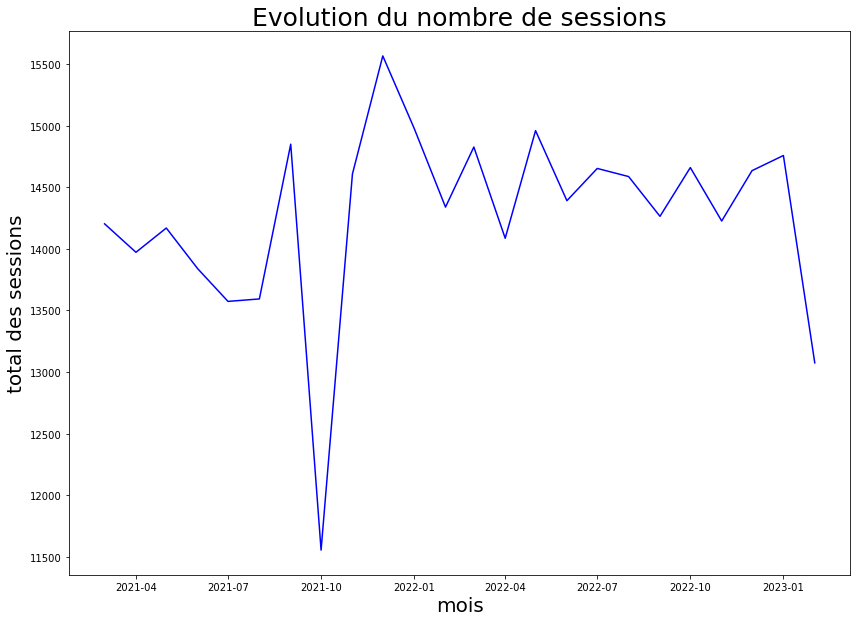

In [28]:
# Vérifications des dates graphe
plt.figure(figsize=(14,10))
plt.plot(nbre_transac['Month'],nbre_transac['session_id'], color = 'b')
plt.title('Evolution du nombre de sessions',fontsize=25)
plt.ylabel('total des sessions',size=20)
plt.xlabel('mois',size=20)
plt.savefig('sessions_mois_lapage.png')

In [29]:
# Pourquoi y a-t-il une chute du nombre de sessions en oct 2021 ??? A explorer après jointure

## Les jointures : création du df global

In [30]:
general_1=transactions.merge(produits,how="outer",on="id_prod",indicator=True)
general_1

,id_prod,date,session_id,client_id,Month,Day,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01,2022-05-20,4.18,0,both
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,2021-09-01,2021-09-26,4.18,0,both
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,2021-05-01,2021-05-06,4.18,0,both
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,2022-03-01,2022-03-16,4.18,0,both
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,2022-11-01,2022-11-12,4.18,0,both
...,...,...,...,...,...,...,...,...,...
679349,0_1624,NaT,NaN,NaN,NaT,NaT,24.50,0,right_only
679350,2_86,NaT,NaN,NaN,NaT,NaT,132.36,2,right_only
679351,0_299,NaT,NaN,NaN,NaT,NaT,22.99,0,right_only
679352,0_510,NaT,NaN,NaN,NaT,NaT,23.66,0,right_only


In [31]:
general_1['_merge'].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['both', 'left_only', 'right_only']

In [32]:
### Produits vendus mais non répertoriés

outer_join_test_left=general_1[general_1['_merge']=='left_only']
outer_join_test_left

,id_prod,date,session_id,client_id,Month,Day,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022-09-01,2022-09-23,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022-07-01,2022-07-23,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022-12-01,2022-12-03,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021-08-01,2021-08-16,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022-07-01,2022-07-16,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,2021-08-01,2021-08-25,NaN,NaN,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,2022-03-01,2022-03-06,NaN,NaN,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,2022-05-01,2022-05-16,NaN,NaN,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,2022-02-01,2022-02-11,NaN,NaN,left_only


In [33]:
print('Produit vendu mais non répertorié à vérifier :', outer_join_test_left['id_prod'].unique())

Produit vendu mais non répertorié à vérifier : ['0_2245']


In [34]:
# Nombre de fois que le produit non répertorié est vendu par mois
outer_join_test_left.groupby(['Month'])['session_id'].count()

Month
2021-03-01     9
2021-04-01    14
2021-05-01     8
2021-06-01     7
2021-07-01     4
2021-08-01     9
2021-09-01    12
2021-10-01     7
2021-11-01    10
2021-12-01     7
2022-01-01     5
2022-02-01    11
2022-03-01    11
2022-04-01    14
2022-05-01    16
2022-06-01     7
2022-07-01    12
2022-08-01     8
2022-09-01     9
2022-10-01    10
2022-11-01    11
2022-12-01     6
2023-01-01     7
2023-02-01     7
Name: session_id, dtype: int64

In [35]:
### Produits non vendus mais répertoriés

outer_join_test_right=general_1[general_1['_merge']=='right_only'].reset_index()
outer_join_test_right

,index,id_prod,date,session_id,client_id,Month,Day,price,categ,_merge
0,679332,0_1016,NaT,NaN,NaN,NaT,NaT,35.06,0,right_only
1,679333,0_1780,NaT,NaN,NaN,NaT,NaT,1.67,0,right_only
2,679334,T_0,NaT,NaN,NaN,NaT,NaT,-1.00,0,right_only
3,679335,0_1062,NaT,NaN,NaN,NaT,NaT,20.08,0,right_only
4,679336,0_1119,NaT,NaN,NaN,NaT,NaT,2.99,0,right_only
5,679337,0_1014,NaT,NaN,NaN,NaT,NaT,1.15,0,right_only
6,679338,1_0,NaT,NaN,NaN,NaT,NaT,31.82,1,right_only
7,679339,0_1318,NaT,NaN,NaN,NaT,NaT,20.92,0,right_only
8,679340,0_1800,NaT,NaN,NaN,NaT,NaT,22.05,0,right_only
9,679341,0_1645,NaT,NaN,NaN,NaT,NaT,2.99,0,right_only


In [36]:
print('22 Produits non vendus mais répertoriés à vérifier :', outer_join_test_right['id_prod'].unique
      (),'. On retrouve bien le produit test T_0 identifié dans le df transactions.')

22 Produits non vendus mais répertoriés à vérifier : ['0_1016' '0_1780' 'T_0' '0_1062' '0_1119' '0_1014' '1_0' '0_1318'
 '0_1800' '0_1645' '0_322' '0_1620' '0_1025' '2_87' '1_394' '2_72' '0_310'
 '0_1624' '2_86' '0_299' '0_510' '0_2308'] . On retrouve bien le produit test T_0 identifié dans le df transactions.


In [37]:
general_11=general_1.loc[general_1['_merge']=='both'].drop(columns=['_merge'])
general_11

,id_prod,date,session_id,client_id,Month,Day,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01,2022-05-20,4.18,0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,2021-09-01,2021-09-26,4.18,0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,2021-05-01,2021-05-06,4.18,0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,2022-03-01,2022-03-16,4.18,0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,2022-11-01,2022-11-12,4.18,0
...,...,...,...,...,...,...,...,...
679327,0_1279,2021-06-23 06:50:48.888907,s_52563,c_1025,2021-06-01,2021-06-23,20.99,0
679328,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2021-12-01,2021-12-24,2.99,0
679329,0_1379,2021-10-16 09:19:09.546713,s_105547,c_5425,2021-10-01,2021-10-16,2.99,0
679330,0_886,2021-03-17 03:34:14.461358,s_7410,c_7219,2021-03-01,2021-03-17,21.82,0


In [38]:
# Jointure avec le df clients
general_2=general_11.merge(clients,how="outer",on="client_id",indicator=True)
general_2

,id_prod,date,session_id,client_id,Month,Day,price,categ,sex,birth,age,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01,2022-05-20,4.18,0,f,1986,35,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07-01,2021-07-20,4.18,0,f,1986,35,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022-08-01,2022-08-20,4.18,0,f,1986,35,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,2022-06-01,2022-06-18,8.57,0,f,1986,35,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,2021-08-01,2021-08-18,8.57,0,f,1986,35,both
...,...,...,...,...,...,...,...,...,...,...,...,...
679129,NaN,NaT,NaN,c_7584,NaT,NaT,NaN,NaN,f,1960,61,right_only
679130,NaN,NaT,NaN,c_90,NaT,NaT,NaN,NaN,m,2001,20,right_only
679131,NaN,NaT,NaN,c_587,NaT,NaT,NaN,NaN,m,1993,28,right_only
679132,NaN,NaT,NaN,ct_1,NaT,NaT,NaN,NaN,m,2001,20,right_only


In [39]:
general_2['_merge'].unique()

['both', 'right_only']
Categories (2, object): ['both', 'right_only']

In [40]:
### clients répertoriés mais non acheteurs
outer_join_test2_right=general_2[general_2['_merge']=='right_only'].reset_index()
outer_join_test2_right

,index,id_prod,date,session_id,client_id,Month,Day,price,categ,sex,birth,age,_merge
0,679111,NaN,NaT,NaN,c_8253,NaT,NaT,NaN,NaN,f,2001,20,right_only
1,679112,NaN,NaT,NaN,c_3789,NaT,NaT,NaN,NaN,f,1997,24,right_only
2,679113,NaN,NaT,NaN,c_4406,NaT,NaT,NaN,NaN,f,1998,23,right_only
3,679114,NaN,NaT,NaN,ct_0,NaT,NaT,NaN,NaN,f,2001,20,right_only
4,679115,NaN,NaT,NaN,c_2706,NaT,NaT,NaN,NaN,f,1967,54,right_only
5,679116,NaN,NaT,NaN,c_3443,NaT,NaT,NaN,NaN,m,1959,62,right_only
6,679117,NaN,NaT,NaN,c_4447,NaT,NaT,NaN,NaN,m,1956,65,right_only
7,679118,NaN,NaT,NaN,c_3017,NaT,NaT,NaN,NaN,f,1992,29,right_only
8,679119,NaN,NaT,NaN,c_4086,NaT,NaT,NaN,NaN,f,1992,29,right_only
9,679120,NaN,NaT,NaN,c_6930,NaT,NaT,NaN,NaN,m,2004,17,right_only


In [41]:
print('23 Clients répertoriés mais non acheteurs :', outer_join_test2_right['client_id'].unique
      (),'. On retrouve bien les clients tests ct_0 et ct_1 identifiés dans le df transactions.')

23 Clients répertoriés mais non acheteurs : ['c_8253' 'c_3789' 'c_4406' 'ct_0' 'c_2706' 'c_3443' 'c_4447' 'c_3017'
 'c_4086' 'c_6930' 'c_4358' 'c_8381' 'c_1223' 'c_6862' 'c_5245' 'c_5223'
 'c_6735' 'c_862' 'c_7584' 'c_90' 'c_587' 'ct_1' 'c_3526'] . On retrouve bien les clients tests ct_0 et ct_1 identifiés dans le df transactions.


In [42]:
general=general_2.loc[general_2['_merge']=='both'].drop(columns=['_merge'])
general

,id_prod,date,session_id,client_id,Month,Day,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01,2022-05-20,4.18,0,f,1986,35
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07-01,2021-07-20,4.18,0,f,1986,35
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022-08-01,2022-08-20,4.18,0,f,1986,35
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,2022-06-01,2022-06-18,8.57,0,f,1986,35
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,2021-08-01,2021-08-18,8.57,0,f,1986,35
...,...,...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,2021-07-01,2021-07-23,181.99,2,f,2001,20
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,2022-03-01,2022-03-25,19.85,0,f,1960,61
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,2021-09-01,2021-09-25,19.85,0,f,1960,61
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,2021-03-01,2021-03-11,100.99,2,m,1992,29


In [43]:
general.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
Month         0
Day           0
price         0
categ         0
sex           0
birth         0
age           0
dtype: int64

In [44]:
general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   Month       679111 non-null  datetime64[ns]
 5   Day         679111 non-null  datetime64[ns]
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  object        
 8   sex         679111 non-null  object        
 9   birth       679111 non-null  int64         
 10  age         679111 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(5)
memory usage: 62.2+ MB


In [45]:
general.describe()

,price,birth,age
count,679111.000000,679111.000000,679111.000000
mean,17.454773,1977.811149,43.188851
std,18.328998,13.575361,13.575361
min,0.620000,1929.000000,17.000000
25%,8.870000,1970.000000,34.000000
50%,13.990000,1980.000000,41.000000
75%,18.990000,1987.000000,51.000000
max,300.000000,2004.000000,92.000000


In [46]:
#### Vérification oct 2021
verif_general=general.groupby(['Month','categ'])[['session_id']].nunique().reset_index()
print(verif_general)

        Month  categ  session_id
0  2021-03-01      0        9592
1  2021-03-01      1        7392
2  2021-03-01      2        1158
3  2021-04-01      0        9962
4  2021-04-01      1        6271
..        ...    ...         ...
67 2023-01-01      1        8026
68 2023-01-01      2        1331
69 2023-02-01      0        8444
70 2023-02-01      1        6945
71 2023-02-01      2        1248

[72 rows x 3 columns]


Text(0, 0.5, 'Nombre de ventes')

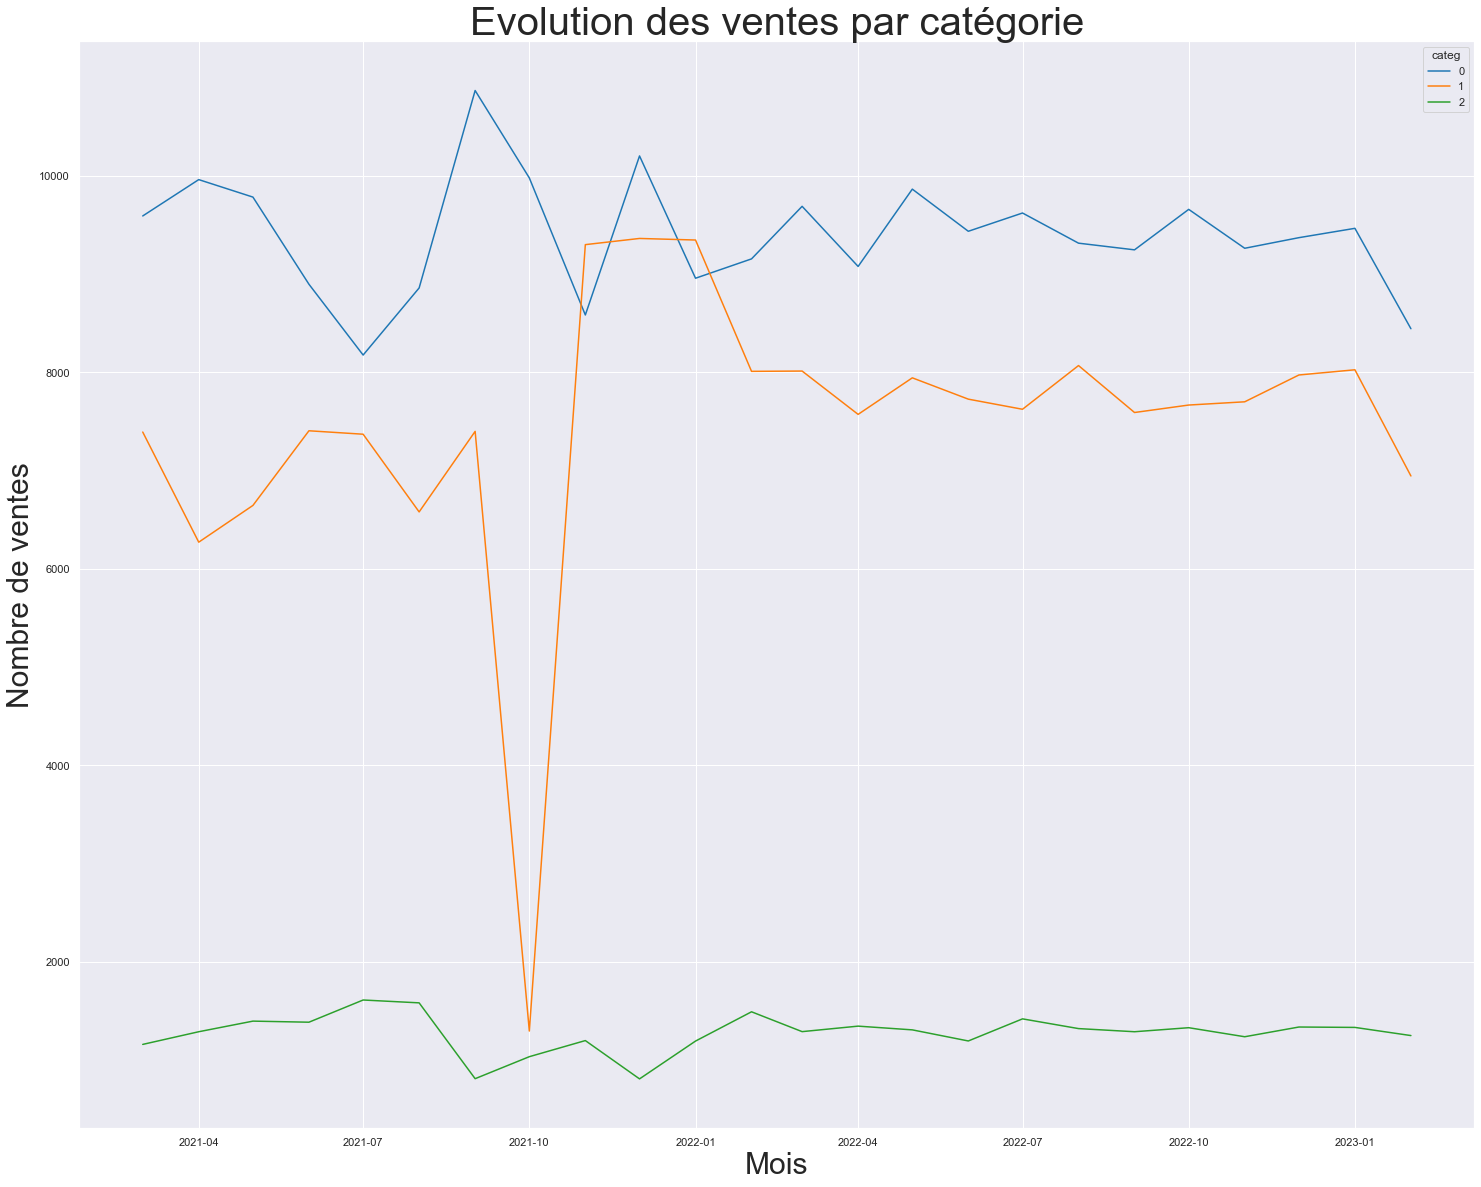

In [47]:
# Vérifications des dates graphe

sns.set(rc = {'figure.figsize':(25,20)})
sns.lineplot(x ="Month", y = 'session_id', data = verif_general, hue = "categ",palette="tab10")
plt.title('Evolution des ventes par catégorie',fontsize=40)
plt.xlabel('Mois',fontsize=30)
plt.ylabel('Nombre de ventes',fontsize=30)

In [48]:
#### Vérification oct 2021
oct=general[general['Month']=='2021-10-01']
verif_oct=oct.groupby(['Day','categ'])[['session_id']].nunique().reset_index()
verif_oct

,Day,categ,session_id
0,2021-10-01,0,334
1,2021-10-01,1,271
2,2021-10-01,2,32
3,2021-10-02,0,335
4,2021-10-02,2,26
...,...,...,...
62,2021-10-30,1,259
63,2021-10-30,2,35
64,2021-10-31,0,310
65,2021-10-31,1,257


Text(0, 0.5, 'Ventes')

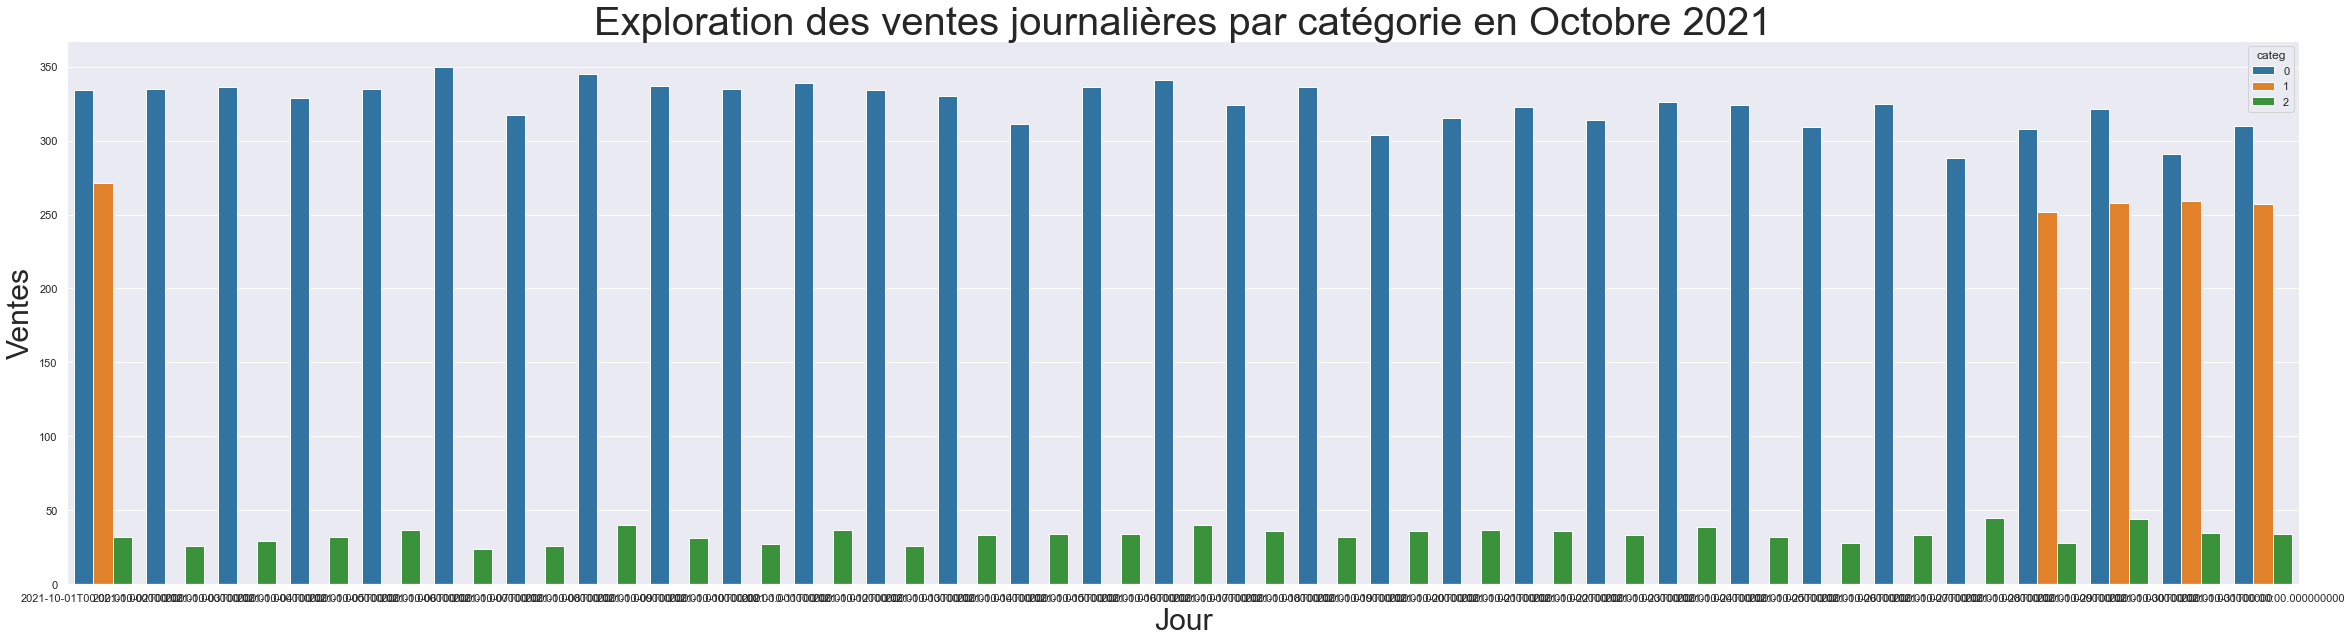

In [49]:
# Vérifications des jours oct graphe

sns.set(rc = {'figure.figsize':(40,10)})
sns.barplot(x ="Day", y = 'session_id', data = verif_oct, hue = "categ",palette="tab10")
plt.title('Exploration des ventes journalières par catégorie en Octobre 2021',fontsize=40)
plt.xlabel('Jour',fontsize=30)
plt.ylabel('Ventes',fontsize=30)

In [50]:
# la categorie 1 disparaît du 2 au 27 octobre inclus
verif_oct2=verif_oct[verif_oct['categ']==1].reset_index()
verif_oct2

,index,Day,categ,session_id
0,1,2021-10-01,1,271
1,56,2021-10-28,1,252
2,59,2021-10-29,1,258
3,62,2021-10-30,1,259
4,65,2021-10-31,1,257


In [51]:
# Etant donné qu'il semble y avoir une erreur ou un évènement perturbateur sur le mois d'octobre et 
# qu'il ne concerne qu'une seule catégorie (categ 1), 
# il semble préférable de supprimer ce mois de l'analyse en attendant d'identifier 
# En effet, ce mois fausse l'analyse des ventes et fausse toute comparaisons entre catégories
# la cause de cette perturbation (erreur de saisie ? interdiction des ventes categ 1 ? ???)
general2=general.drop(general[general['Month']=='2021-10-01'].index)
general2

,id_prod,date,session_id,client_id,Month,Day,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01,2022-05-20,4.18,0,f,1986,35
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07-01,2021-07-20,4.18,0,f,1986,35
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022-08-01,2022-08-20,4.18,0,f,1986,35
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,2022-06-01,2022-06-18,8.57,0,f,1986,35
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,2021-08-01,2021-08-18,8.57,0,f,1986,35
...,...,...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,2021-07-01,2021-07-23,181.99,2,f,2001,20
679107,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,2022-03-01,2022-03-25,19.85,0,f,1960,61
679108,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,2021-09-01,2021-09-25,19.85,0,f,1960,61
679109,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,2021-03-01,2021-03-11,100.99,2,m,1992,29


In [52]:
# Ajout d'une colonne classe d'âge pour analyse
bin_labels=labels=['moins de 20','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']

general2['classe_age'] = pd.cut(x=general2['age'], bins=[0,20,30,40,50,60,70,80,90,100],labels=bin_labels)
general2.head(50)

,id_prod,date,session_id,client_id,Month,Day,price,categ,sex,birth,age,classe_age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-01,2022-05-20,4.18,0,f,1986,35,30-39
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,2021-07-01,2021-07-20,4.18,0,f,1986,35,30-39
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,2022-08-01,2022-08-20,4.18,0,f,1986,35,30-39
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,2022-06-01,2022-06-18,8.57,0,f,1986,35,30-39
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,2021-08-01,2021-08-18,8.57,0,f,1986,35,30-39
5,0_2110,2022-07-27 22:36:01.316670,s_244686,c_103,2022-07-01,2022-07-27,7.04,0,f,1986,35,30-39
6,0_2110,2021-12-27 22:36:01.316670,s_141025,c_103,2021-12-01,2021-12-27,7.04,0,f,1986,35,30-39
7,0_1083,2021-12-21 02:10:36.948191,s_137499,c_103,2021-12-01,2021-12-21,16.99,0,f,1986,35,30-39
8,1_381,2021-03-09 22:50:06.094144,s_4122,c_103,2021-03-01,2021-03-09,15.99,1,f,1986,35,30-39
9,1_370,2022-09-07 18:33:52.869353,s_264739,c_103,2022-09-01,2022-09-07,13.11,1,f,1986,35,30-39


# Deuxième partie : Analyse des différents indicateurs de vente

## A - Indicateurs et graphique autour du CA

In [53]:
# Evolution du CA par mois
CA_par_mois=general2.groupby('Month')['price'].sum().reset_index()
CA_par_mois.rename(columns={'price': 'CA_du_mois'}, inplace=True)
CA_par_mois1=CA_par_mois.set_index(['Month'])
CA_par_mois1

,CA_du_mois
Month,
2021-03-01,482440.61
2021-04-01,476109.30
2021-05-01,492943.47
2021-06-01,484088.56
2021-07-01,482835.40
2021-08-01,482284.79
2021-09-01,507240.68
2021-11-01,516167.73
2021-12-01,525917.28


In [54]:
# Creation de la colonne des moyennes mobiles sur trois mois (trimestre) avec un mois minimum pour calcul
CA_par_mois1['moyMobile'] = CA_par_mois1.rolling(window=3,center=True,min_periods=1).mean()
CA_par_mois1

,CA_du_mois,moyMobile
Month,,
2021-03-01,482440.61,479274.955000
2021-04-01,476109.30,483831.126667
2021-05-01,492943.47,484380.443333
2021-06-01,484088.56,486622.476667
2021-07-01,482835.40,483069.583333
2021-08-01,482284.79,490786.956667
2021-09-01,507240.68,501897.733333
2021-11-01,516167.73,516441.896667
2021-12-01,525917.28,522474.666667


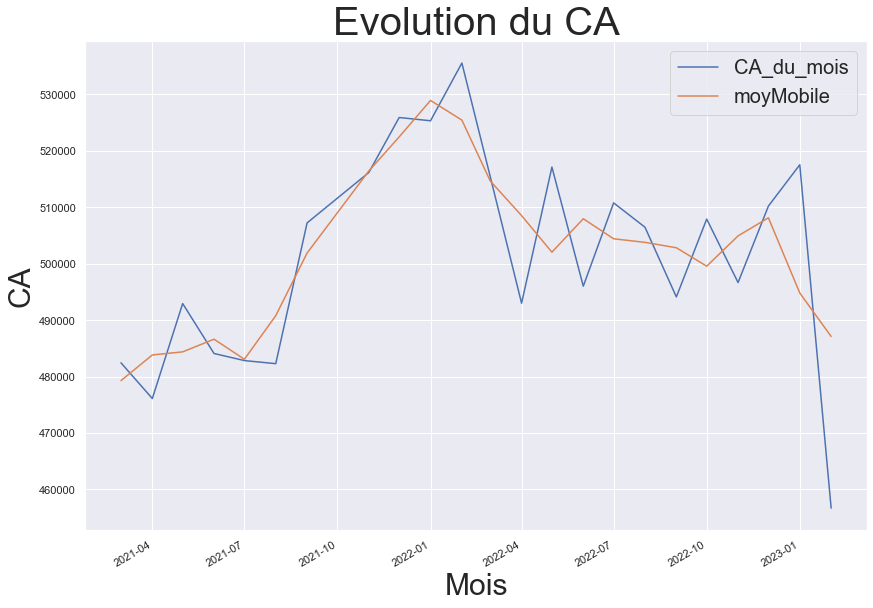

In [55]:
plt.figure(figsize=(14,10))
CA_par_mois1['CA_du_mois'].plot()
CA_par_mois1['moyMobile'].plot()
plt.title('Evolution du CA',fontsize=40)
plt.xlabel('Mois',fontsize=30)
plt.ylabel('CA',fontsize=30)
plt.legend(prop={'size': 20})
plt.show()

In [56]:
# Evolution du CA par catégorie par mois
CA_par_categ_mois=general2.groupby(['Month','categ'])['price'].sum().reset_index()
CA_par_categ_mois.rename(columns={'price': 'CA_categ_mois'}, inplace=True)
CA_par_categ_mois

,Month,categ,CA_categ_mois
0,2021-03-01,0,193629.17
1,2021-03-01,1,186974.17
2,2021-03-01,2,101837.27
3,2021-04-01,0,205222.46
4,2021-04-01,1,156138.35
...,...,...,...
64,2023-01-01,1,210104.41
65,2023-01-01,2,126153.08
66,2023-02-01,0,162457.00
67,2023-02-01,1,180347.24


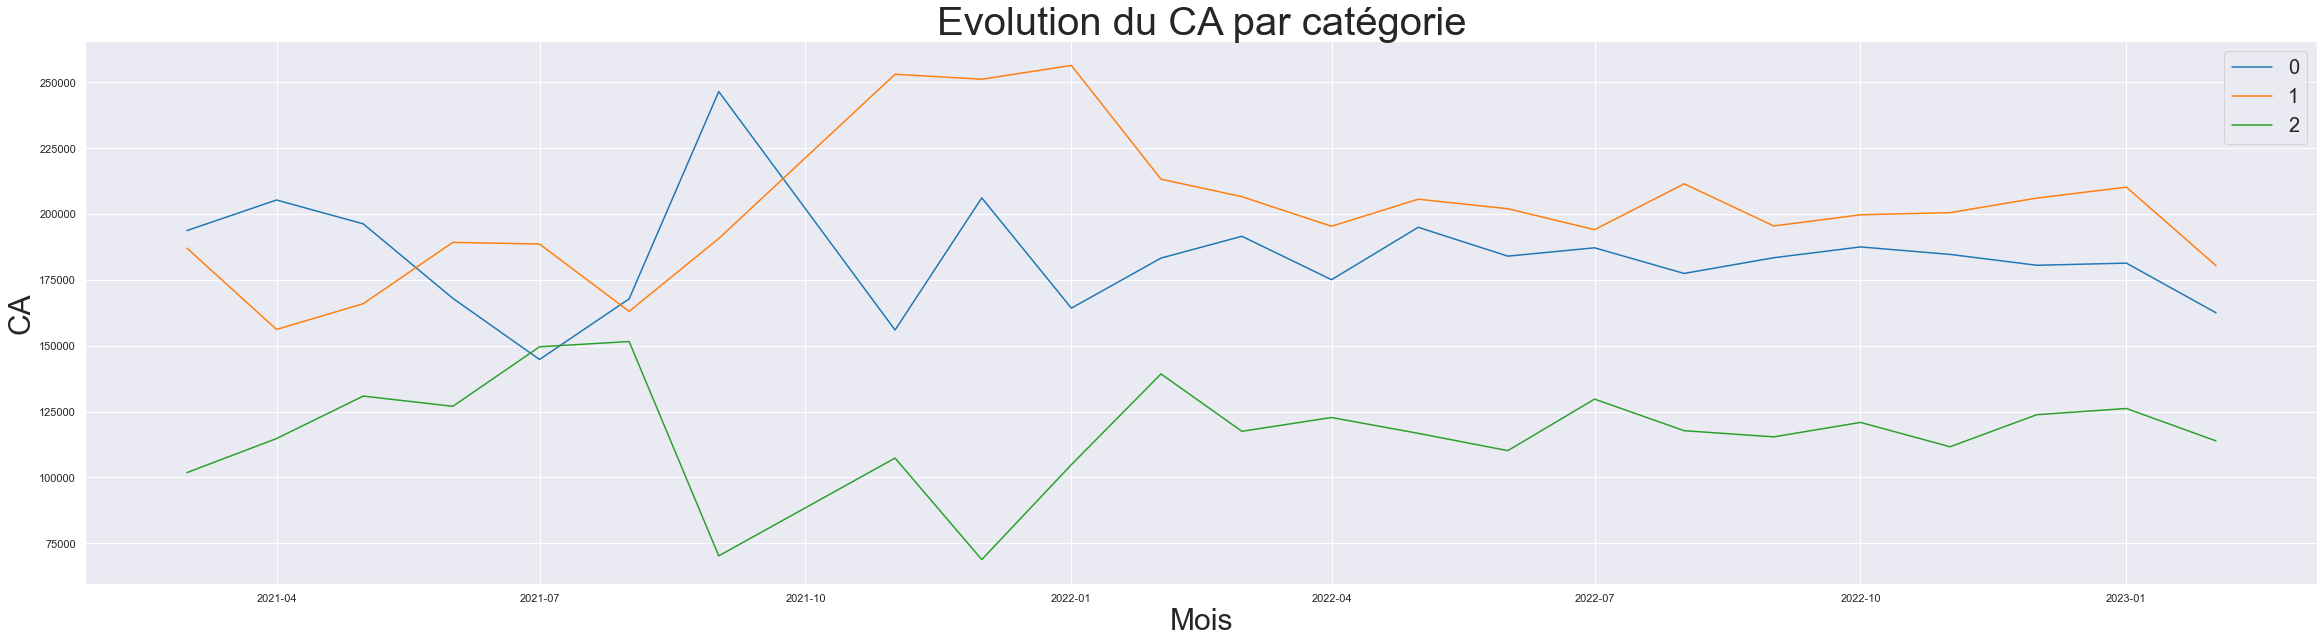

In [57]:
# Evolution du CA par catégories
sns.lineplot(x ="Month", y = 'CA_categ_mois', data = CA_par_categ_mois, hue = "categ",palette="tab10")
plt.title('Evolution du CA par catégorie',fontsize=40)
plt.xlabel('Mois',fontsize=30)
plt.ylabel('CA',fontsize=30)
plt.legend(prop={'size': 20})

In [58]:
print("le CA total sur la période (hors Oct 2021) est de ","{:.2f}".format(general2['price'].sum()),"euros")

le CA total sur la période (hors Oct 2021) est de  11532929.94 euros


Text(0, 0.5, 'Nombre de ventes')

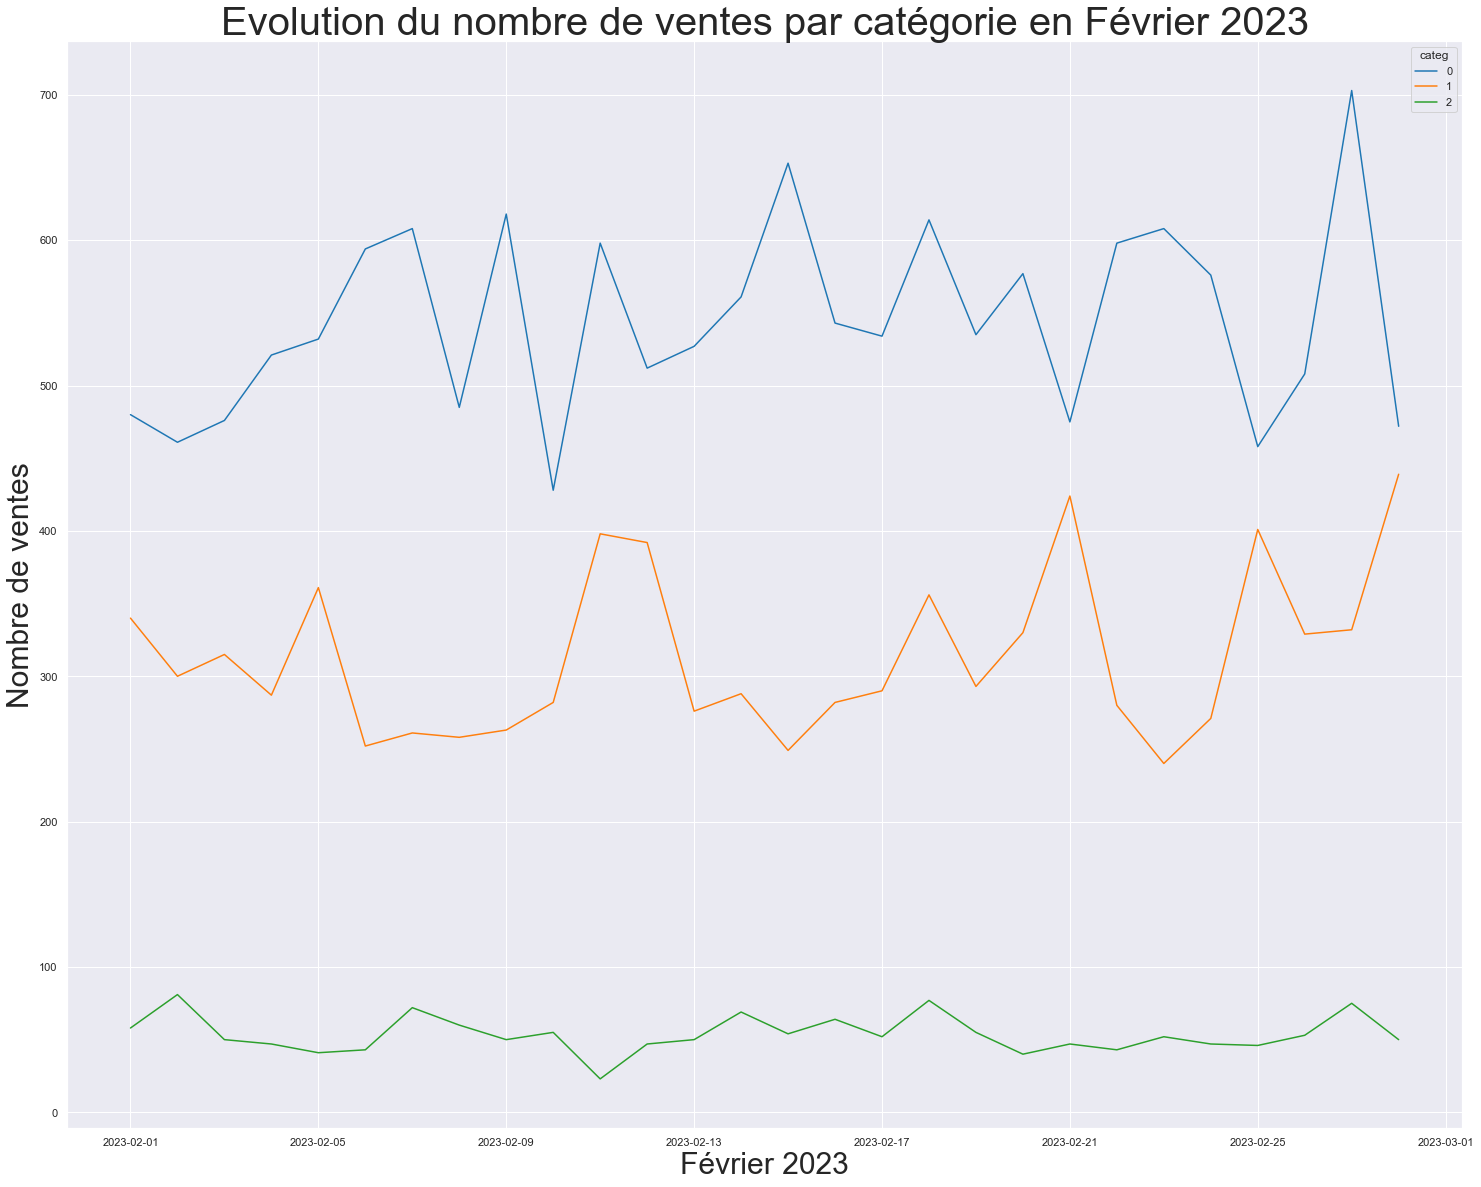

In [59]:
##### Baisse du CA (sur toutes les catégories) sur le dernier mois (février 2023), 
# à explorer part le service concerné

fev=general2[general2['Month']=='2023-02-01']
fev_test=fev.groupby(['Day','categ'])['session_id'].count().reset_index()
fev_test.rename(columns={'session_id': 'nbre_sessions'}, inplace=True)

sns.set(rc = {'figure.figsize':(25,20)})
sns.lineplot(x ="Day", y = 'nbre_sessions', data = fev_test, hue = "categ",palette="tab10")
plt.title('Evolution du nombre de ventes par catégorie en Février 2023',fontsize=40)
plt.xlabel('Février 2023',fontsize=30)
plt.ylabel('Nombre de ventes',fontsize=30)

## B - Zoom sur les références :
Tops et flops et répartition par catégorie

In [60]:
#### les produits les plus vendus appartiennent tous à la catégorie 1
les_tops=general2.groupby(['id_prod','categ','price'])[
    'session_id'].count().sort_values(ascending=False).head(10).reset_index()
les_tops.rename(columns={'session_id': 'nombre_de_vente'}, inplace=True)
les_tops

,id_prod,categ,price,nombre_de_vente
0,1_369,1,23.99,2237
1,1_417,1,20.99,2173
2,1_414,1,23.83,2166
3,1_498,1,23.37,2117
4,1_425,1,16.99,2084
5,1_403,1,17.99,1950
6,1_412,1,16.65,1938
7,1_413,1,17.99,1931
8,1_406,1,24.81,1931
9,1_407,1,15.99,1923


In [61]:
#### les produits les moins vendus appartiennent surtout à la catégorie 0
les_flops=general2.groupby(['id_prod','categ','price'])[
    'session_id'].count().sort_values(ascending=True).head(10).reset_index()
les_flops.rename(columns={'session_id': 'nombre_de_vente'}, inplace=True)
les_flops

,id_prod,categ,price,nombre_de_vente
0,0_1151,0,2.99,1
1,0_898,0,1.27,1
2,0_886,0,21.82,1
3,0_833,0,2.99,1
4,0_807,0,1.99,1
5,2_23,2,115.99,1
6,0_1498,0,2.48,1
7,0_541,0,1.99,1
8,0_1533,0,27.99,1
9,0_1539,0,0.99,1


In [62]:
# Répartition du CA total par catégorie
CA_par_categorie=general2.groupby(['categ'])['price'].sum().reset_index()
CA_par_categorie.rename(columns={'price': 'CA_par_categorie'}, inplace=True)
CA_par_categorie

,categ,CA_par_categorie
0,0,4.220480e+06
1,1,4.619960e+06
2,2,2.692489e+06


In [63]:
# Description des prix par catégorie
categ_produits_prix_describe=general2.groupby(['categ'])['price'].describe().reset_index()
categ_produits_prix_describe

,categ,count,mean,std,min,25%,50%,75%,max
0,0,396697.0,10.639052,4.934889,0.62,6.29,9.99,14.45,40.99
1,1,225503.0,20.487357,7.588742,2.00,15.81,19.08,24.98,80.99
2,2,35312.0,76.248568,39.809795,30.99,53.99,62.83,73.72,300.00


In [64]:
# Répartition des produits par catégorie
produits_par_categ=general2.groupby(['categ'])['id_prod'].nunique().reset_index()
produits_par_categ.rename(columns={'id_prod': 'nombre_de_produits'}, inplace=True)
produits_par_categ

,categ,nombre_de_produits
0,0,2290
1,1,737
2,2,236


In [65]:
boxplot_prix_categ=general2.groupby(['categ','price'])['id_prod'].nunique().reset_index()
boxplot_prix_categ.rename(columns={'id_prod': 'id_prod_count'}, inplace=True)
boxplot_prix_categ

,categ,price,id_prod_count
0,0,0.62,2
1,0,0.66,1
2,0,0.77,1
3,0,0.81,1
4,0,0.88,1
...,...,...,...
1563,2,233.54,1
1564,2,236.99,1
1565,2,247.22,1
1566,2,254.44,1


Text(0, 0.5, 'Prix')

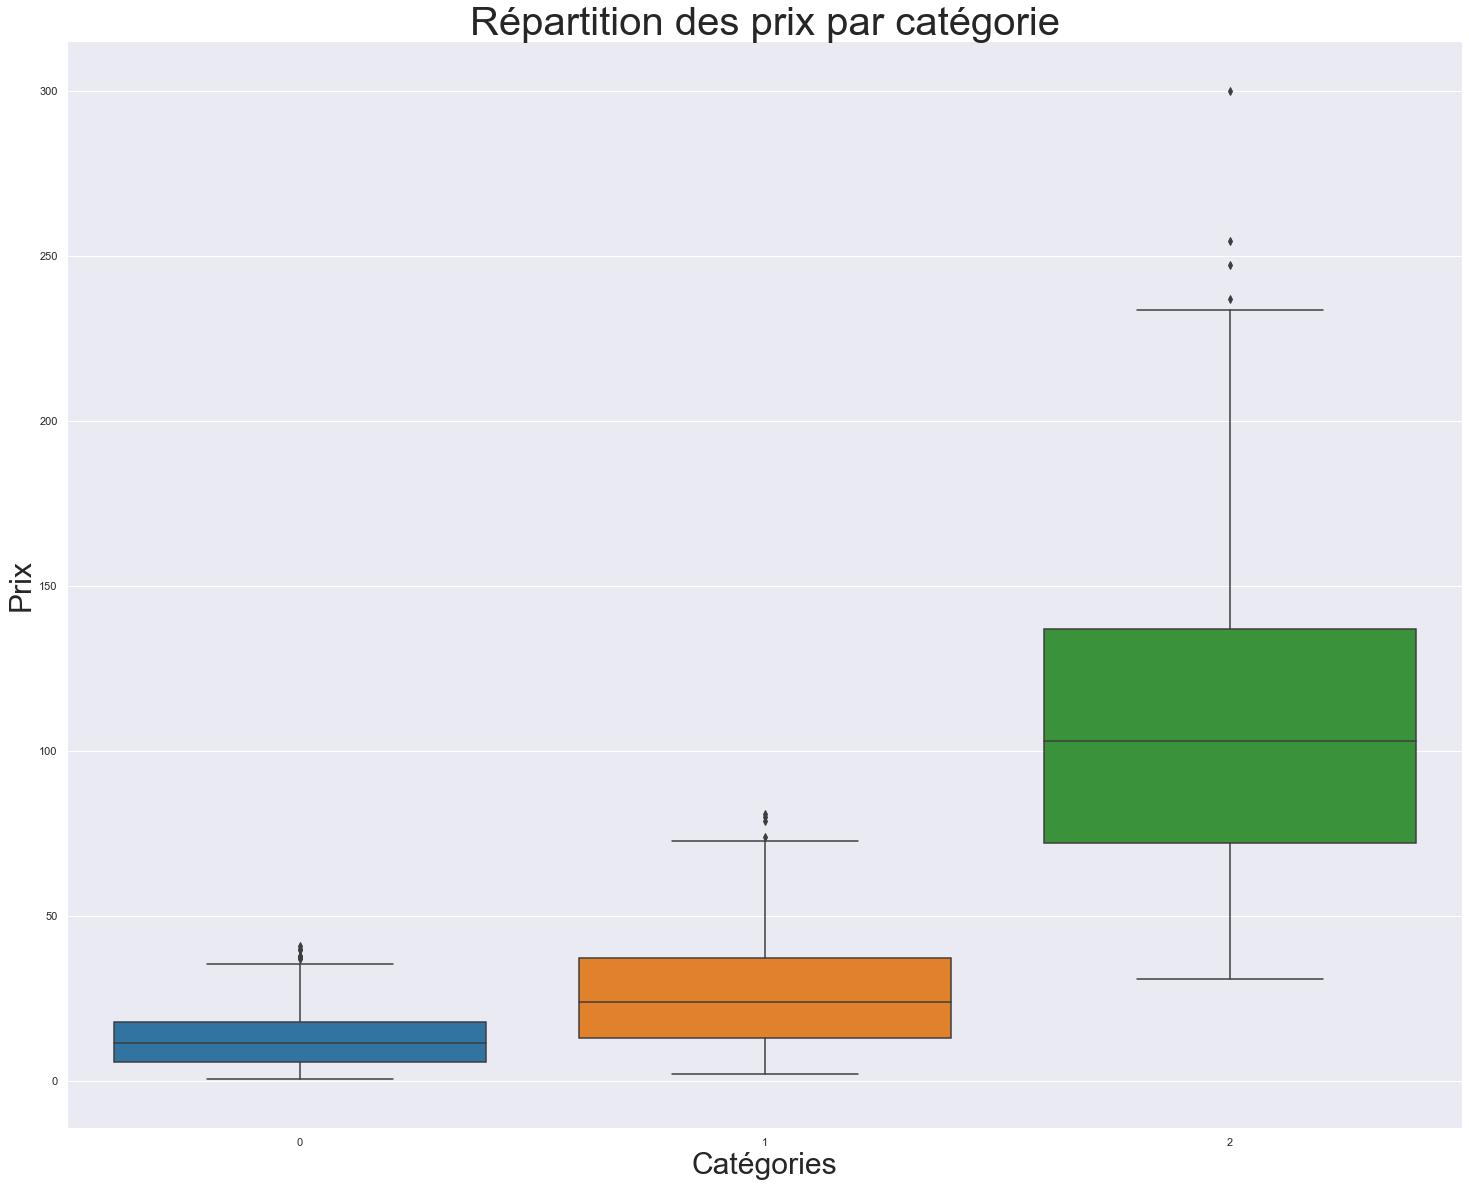

In [66]:
# extention des prix par catégorie
sns.boxplot(x="categ", y="price", data=boxplot_prix_categ,palette="tab10")
plt.title('Répartition des prix par catégorie',fontsize=40)
plt.xlabel('Catégories',fontsize=30)
plt.ylabel('Prix',fontsize=30)

## C - Infos profils clients
répartition du CA par sexe et répartition du CA par âge à l'aide d'une courbe de Lorenz

In [67]:
general2.groupby(['sex'])['client_id'].nunique()

sex
f    4477
m    4121
Name: client_id, dtype: int64

In [68]:
### CA par sexe
CA_par_sexe=general2[['sex','price']].groupby('sex').agg({'sum','mean'}).reset_index()
CA_par_sexe

sex         price           
                sum       mean
0   f  5.704395e+06  17.402324
1   m  5.828535e+06  17.677388

In [69]:
### CA par categ par sexe
CA_par_categ_sexe=general2.groupby(['sex','categ'])['price'].sum().reset_index()
CA_par_categ_sexe.rename(columns={'price': 'CA'}, inplace=True)
CA_par_categ_sexe

,sex,categ,CA
0,f,0,2.093117e+06
1,f,1,2.341981e+06
2,f,2,1.269296e+06
3,m,0,2.127363e+06
4,m,1,2.277979e+06
5,m,2,1.423193e+06


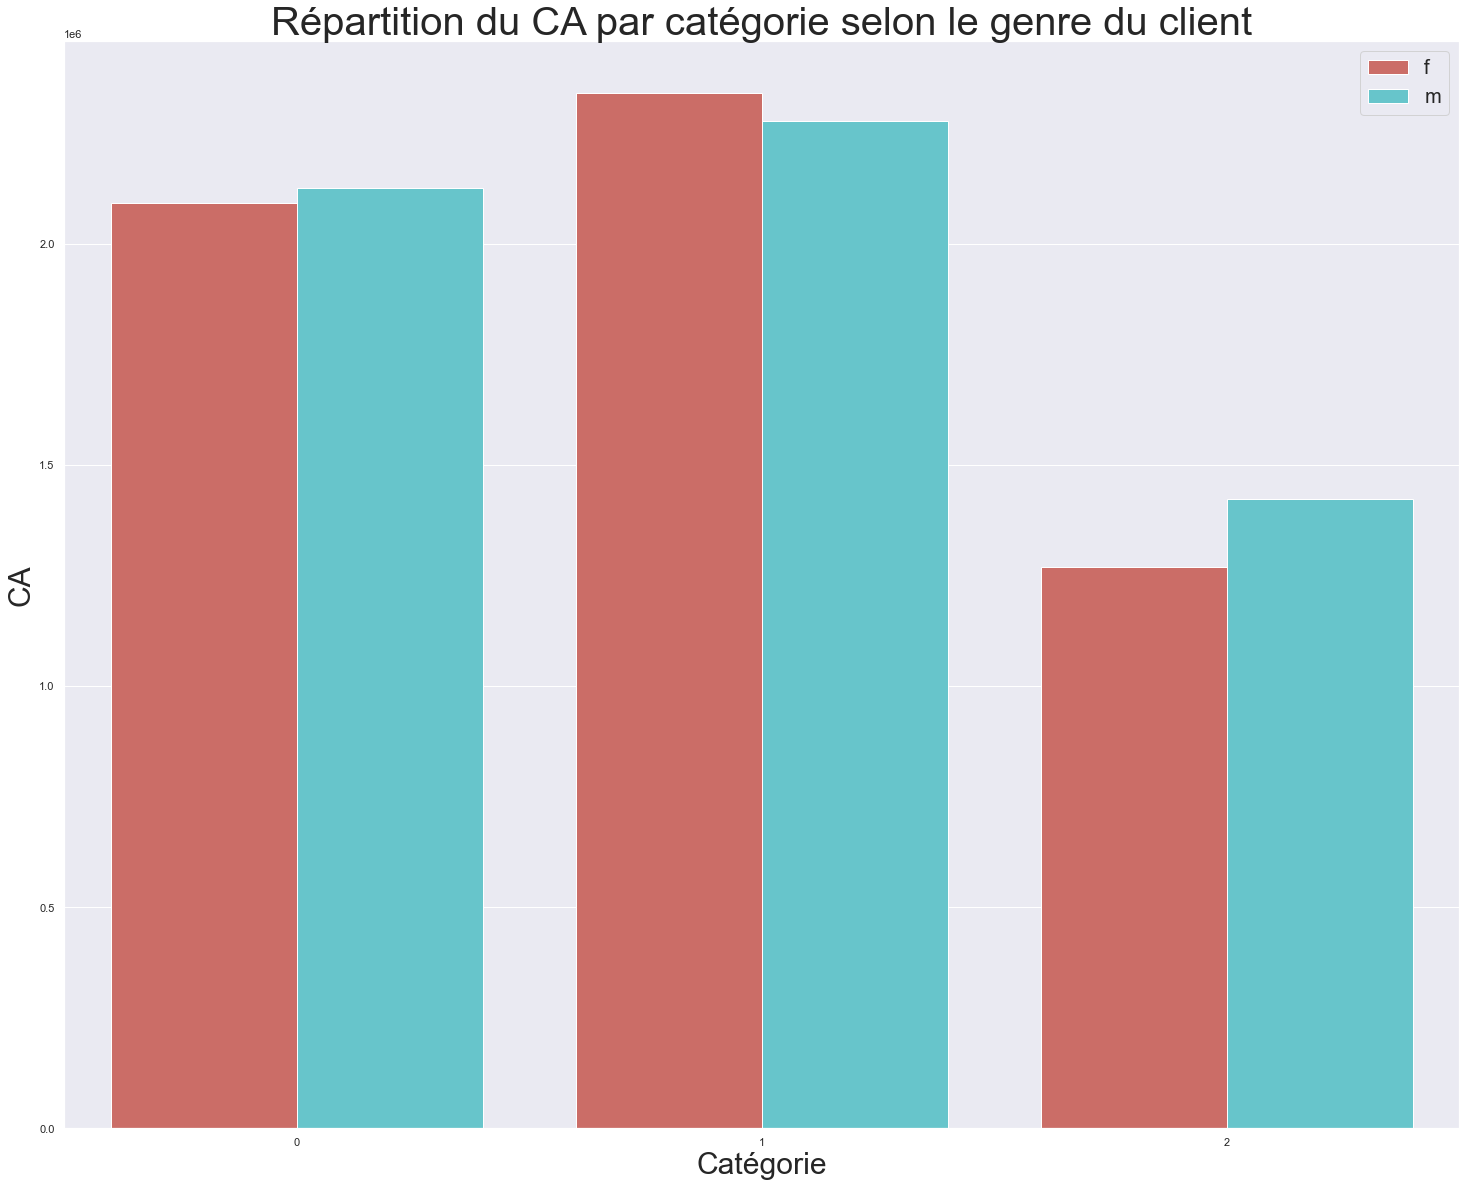

In [70]:
# CA par categ par sex
sns.barplot(x ="categ", y = 'CA', data = CA_par_categ_sexe, hue = "sex",palette="hls")
plt.title('Répartition du CA par catégorie selon le genre du client',fontsize=40)
plt.xlabel('Catégorie',fontsize=30)
plt.ylabel('CA',fontsize=30)
plt.legend(prop={'size': 20})

In [71]:
### Il n'y a que sur la catégorie 1 que les femmes achètent plus.

In [72]:
#nombre de clients par classe d'âge
nombre_client=general2.groupby(['classe_age'])['client_id'].nunique().reset_index()
nombre_client.rename(columns={'client_id': 'nbre_clients'}, inplace=True)
nombre_client

,classe_age,nbre_clients
0,moins de 20,852
1,20-29,1559
2,30-39,1670
3,40-49,1712
4,50-59,1315
5,60-69,966
6,70-79,379
7,80-89,138
8,90-99,7


Text(0.5, 1.0, 'Répartition des clients par tranche d age')

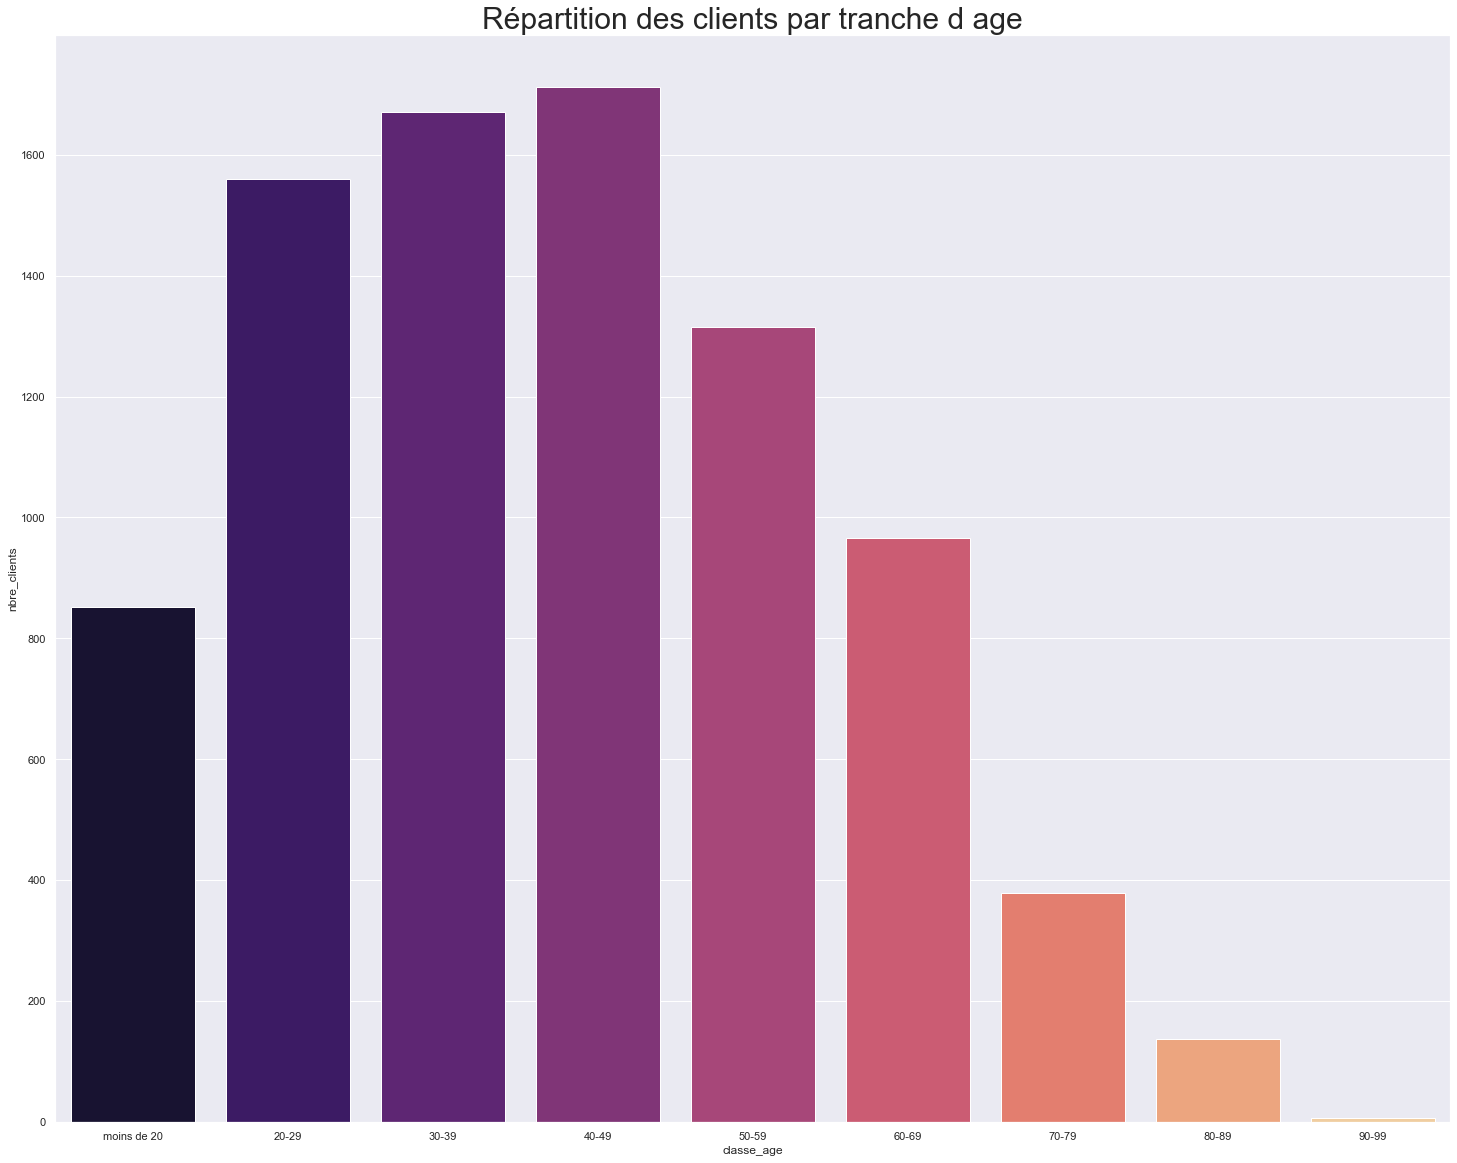

In [73]:
sns.barplot(x='classe_age',y='nbre_clients',data=nombre_client,palette='magma')
plt.title('Répartition des clients par tranche d age',fontsize=30)

In [74]:
# Nbre de ventes par categ par classe_age
ventes_par_classe_age=general2.groupby(['classe_age','categ'])[['price']].count().reset_index()
ventes_par_classe_age.rename(columns={'price': 'nbre_ventes'}, inplace=True)
ventes_par_classe_age

,classe_age,categ,nbre_ventes
0,moins de 20,0,6041
1,moins de 20,1,10593
2,moins de 20,2,10999
3,20-29,0,22082
4,20-29,1,22942
5,20-29,2,21206
6,30-39,0,143783
7,30-39,1,46229
8,30-39,2,736
9,40-49,0,152724


In [75]:
# CA par categ par classe_age
CA_par_classe_age=general2.groupby(['classe_age','categ'])[['price']].sum().reset_index()
CA_par_classe_age.rename(columns={'price': 'CA'}, inplace=True)
CA_par_classe_age

,classe_age,categ,CA
0,moins de 20,0,6.428126e+04
1,moins de 20,1,2.190179e+05
2,moins de 20,2,8.340616e+05
3,20-29,0,2.357380e+05
4,20-29,1,4.706150e+05
5,20-29,2,1.595746e+06
6,30-39,0,1.531268e+06
7,30-39,1,9.437574e+05
8,30-39,2,6.566269e+04
9,40-49,0,1.619110e+06


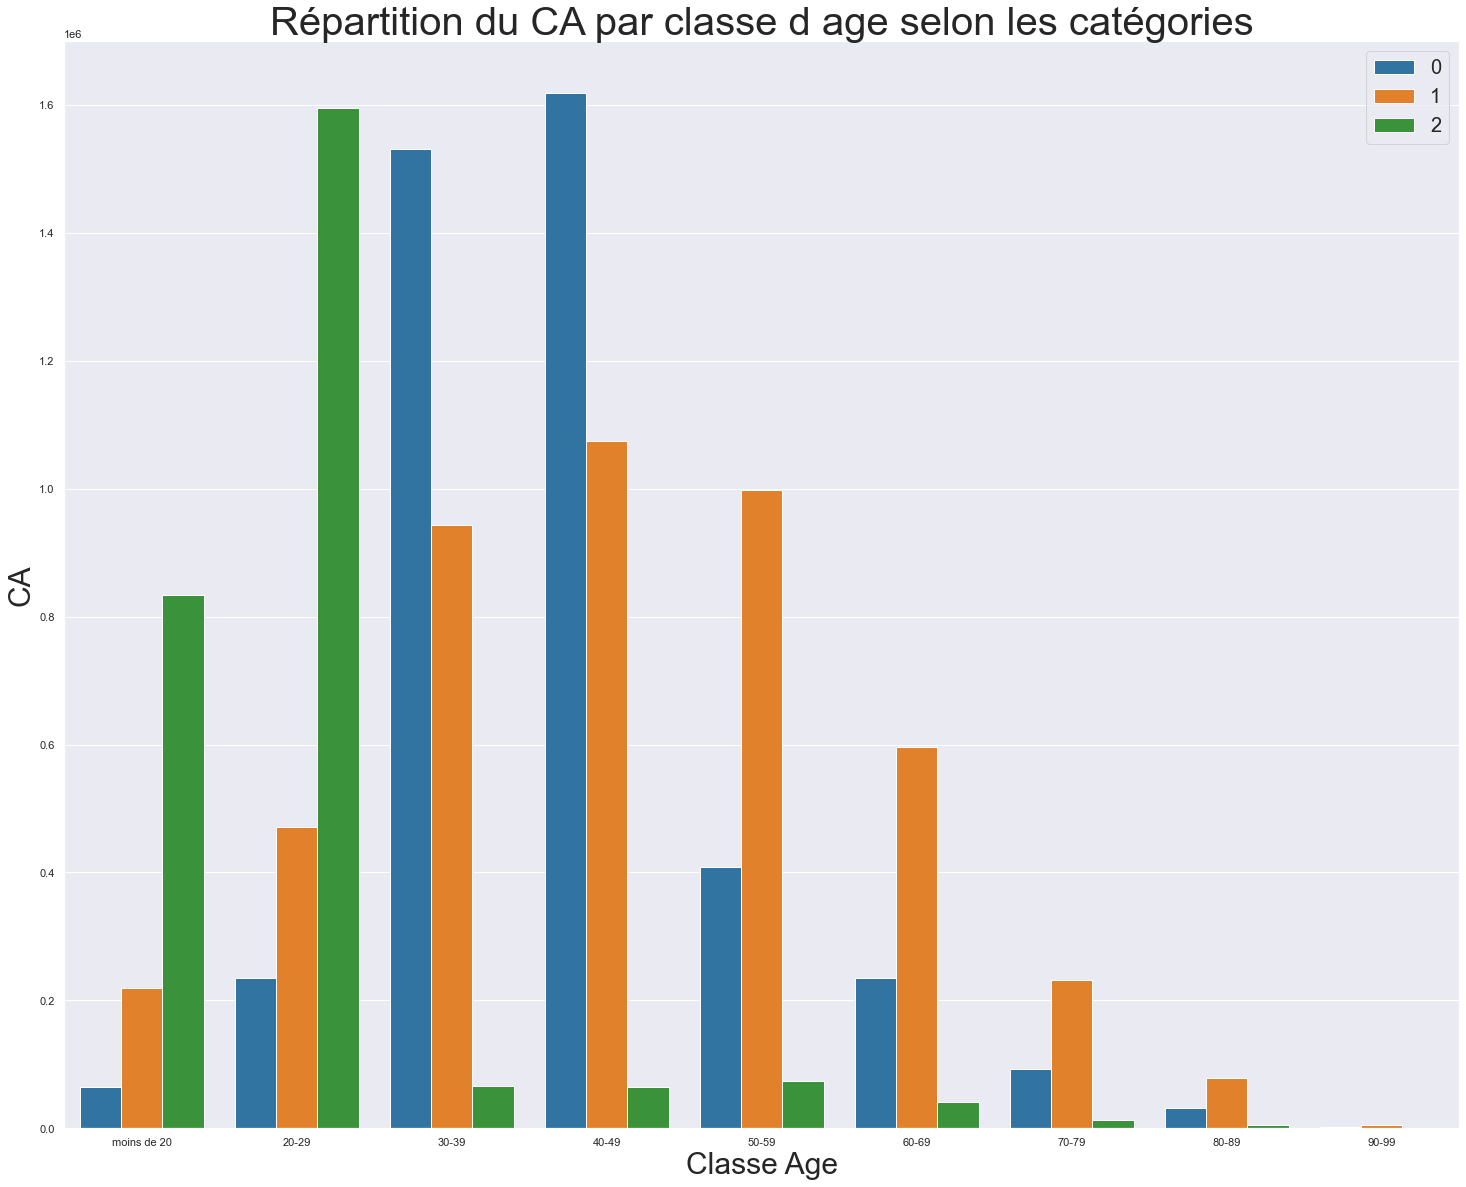

In [76]:
# CA par classe age par categ
sns.set(rc = {'figure.figsize':(25,20)})
sns.barplot(x ="classe_age", y = 'CA', data = CA_par_classe_age, hue = "categ",palette="tab10")
plt.title('Répartition du CA par classe d age selon les catégories',fontsize=40)
plt.xlabel('Classe Age',fontsize=30)
plt.ylabel('CA',fontsize=30)
plt.legend(prop={'size': 20})

In [77]:
# CA par categ par age
CA_par_age=general2.groupby(['age','categ'])[['price']].sum().reset_index()
CA_par_age.rename(columns={'price': 'CA'}, inplace=True)
CA_par_age

,age,categ,CA
0,17,0,34472.92
1,17,1,117403.94
2,17,2,439537.37
3,18,0,8863.17
4,18,1,34104.79
...,...,...,...
223,91,1,3055.16
224,91,2,111.98
225,92,0,691.99
226,92,1,2359.10


In [78]:
# CA par âge
CA_par_age=general2.groupby('age')[['price']].sum().reset_index()
CA_par_age.rename(columns={'price': 'CA'}, inplace=True)
CA_par_age

,age,CA
0,17,591414.23
1,18,172831.75
2,19,178767.19
3,20,174347.66
4,21,160555.21
...,...,...
71,88,5078.98
72,89,4803.64
73,90,2691.19
74,91,3959.24


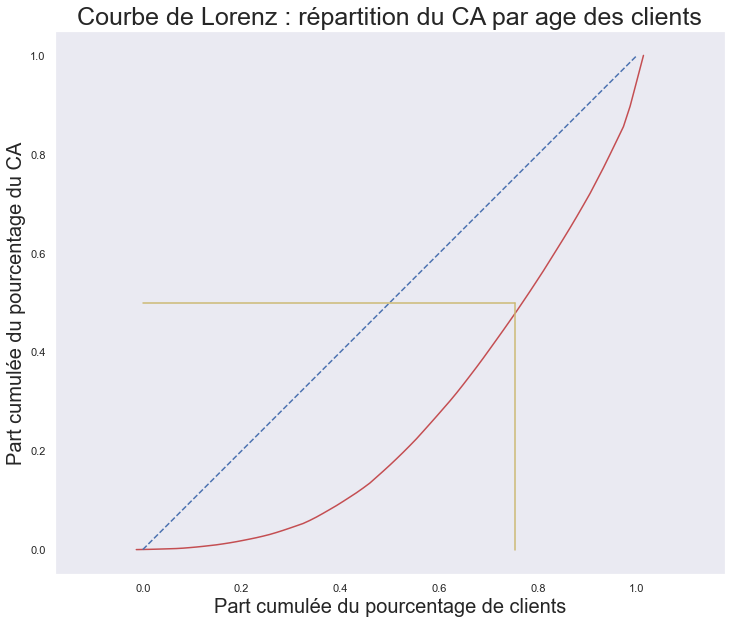

In [79]:
### Courbe de Lorenz pour répartition du CA par age
plt.figure(figsize=(12,10))
CA=CA_par_age['CA'].values
n = len(CA)
lorenz = np.cumsum(np.sort(CA)) / CA.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, 
#plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,'r')
plt.plot([0.0, 1.0], [0.0, 1.0], 'b',linestyle='--') # Red straight line
medial = lorenz[(lorenz < 0.5)].size / lorenz.size 
plt.plot([medial,medial],[0,0.5],'y')
plt.plot([0,medial],[0.5,0.5],'y')
plt.title('Courbe de Lorenz : répartition du CA par age des clients',fontsize=25)
plt.xlabel('Part cumulée du pourcentage de clients',fontsize=20)
plt.ylabel('Part cumulée du pourcentage du CA',fontsize=20)
plt.grid()
plt.show()
### add legend


In [80]:
### Le tracé en jaune est la médiale
medial

0.7532467532467533

In [81]:
# Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. 
#Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, 
# on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('L indice de Gini est de :', "{:.2f}".format(gini) , ".La répartition par âge du CA n'est pas égalitaire.")

L indice de Gini est de : 0.45 .La répartition par âge du CA n'est pas égalitaire.


## D - Petits ou gros clients ?

In [82]:
#taille clients
taille_clients=general2.groupby(['client_id'])['price'].sum().sort_values(ascending=False).reset_index()
taille_clients.rename(columns={'price': 'CA'}, inplace=True)
taille_clients

,client_id,CA
0,c_1609,312755.08
1,c_4958,282654.61
2,c_6714,149783.75
3,c_3454,111766.71
4,c_2899,5214.05
...,...,...
8593,c_2793,12.99
8594,c_4648,11.20
8595,c_240,11.06
8596,c_8114,9.98


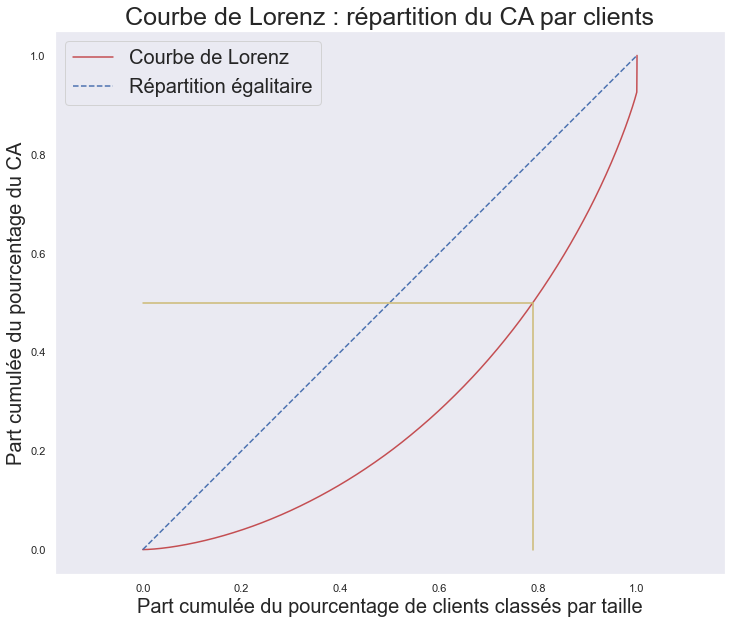

In [83]:
# Faire courbe de lorenz avec taille des clients ?
### Courbe de Lorenz pour répartition du CA par age
plt.figure(figsize=(12,10))
CA1=taille_clients['CA'].values
n1 = len(CA1)
lorenz1 = np.cumsum(np.sort(CA1)) / CA1.sum()
lorenz1 = np.append([0],lorenz1) # La courbe de Lorenz commence à 0
plt.axes().axis('equal')
xaxis1 = np.linspace(0-1/n1,1+1/n1,n1+1) #Il y a un segment de taille n pour chaque individu, 
#plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis1,lorenz1,'r',label="Courbe de Lorenz")
plt.plot([0.0, 1.0], [0.0, 1.0], 'b',linestyle='--',label='Répartition égalitaire') # Red straight line
plt.legend(prop={'size': 20})
medial1 = lorenz1[(lorenz1 < 0.5)].size / lorenz1.size 
plt.plot([medial1,medial1],[0,0.5],'y')
plt.plot([0,medial1],[0.5,0.5],'y')
plt.title('Courbe de Lorenz : répartition du CA par clients',fontsize=25)
plt.xlabel('Part cumulée du pourcentage de clients classés par taille',fontsize=20)
plt.ylabel('Part cumulée du pourcentage du CA',fontsize=20)
plt.grid()
plt.show()
### add legend


In [84]:
medial1

0.7893941155948366

In [85]:
# Calcul de l'indice de Gini
AUC1 = (lorenz1.sum() -lorenz1[-1]/2 -lorenz1[0]/2)/n1 # Surface sous la courbe de Lorenz. 
#Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, 
# on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S1 = 0.5 - AUC1 # surface entre la première bissectrice et le courbe de Lorenz
gini1 = 2*S1
print('L indice de Gini est de :', "{:.2f}".format(gini1)
      , ".La répartition par client du CA n'est pas égalitaire.")

L indice de Gini est de : 0.45 .La répartition par client du CA n'est pas égalitaire.


In [86]:
####### Remarque : 4 GROS clients se démarquent, est-ce du BtoB ? #######
quatre_gros=['c_1609', 'c_4958', 'c_6714', 'c_3454']
filtered_4G = general2[general2.client_id.isin(quatre_gros)]
filtered_4G

,id_prod,date,session_id,client_id,Month,Day,price,categ,sex,birth,age,classe_age
4607,0_1518,2022-04-27 17:10:40.102676,s_200245,c_1609,2022-04-01,2022-04-27,4.18,0,m,1980,41,40-49
4608,0_1518,2021-12-20 04:12:39.844775,s_137046,c_1609,2021-12-01,2021-12-20,4.18,0,m,1980,41,40-49
4609,0_1518,2023-02-15 15:20:37.281734,s_342011,c_1609,2023-02-01,2023-02-15,4.18,0,m,1980,41,40-49
4610,0_1518,2021-05-27 17:10:40.102676,s_40318,c_1609,2021-05-01,2021-05-27,4.18,0,m,1980,41,40-49
4612,0_1518,2022-12-05 11:37:00.430379,s_307418,c_1609,2022-12-01,2022-12-05,4.18,0,m,1980,41,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...
103396,2_16,2023-01-03 00:37:37.276706,s_321139,c_4958,2023-01-01,2023-01-03,84.29,2,m,1999,22,20-29
103397,2_16,2022-01-03 00:37:37.276706,s_144116,c_4958,2022-01-01,2022-01-03,84.29,2,m,1999,22,20-29
103398,2_16,2022-03-03 00:37:37.276706,s_173488,c_4958,2022-03-01,2022-03-03,84.29,2,m,1999,22,20-29
103399,2_21,2022-07-04 05:10:52.214680,s_233285,c_4958,2022-07-01,2022-07-04,105.99,2,m,1999,22,20-29


In [87]:
print("Les quatre outliers ou gros clients représentent ","{:.2f}".format(
    filtered_4G['price'].sum()),"euros, soit ","{:.2f}".format(filtered_4G['price'].sum
                                                               ()*100/general2['price'].sum()),"% du CA.")

Les quatre outliers ou gros clients représentent  856960.15 euros, soit  7.43 % du CA.


# Troisième partie : Analyse des comportements clients

## A - Catégories de livres achetés par genre (homme-femme) CHI 2
deux variables qualitatives : Chi2 d'indépendance (test si deux caracteristiques d'une pop sont indepdtes)
Hypothèse testée : "Les variables genre et catégorie de livres sont indépendantes".
Ho = Le choix de catégorie (0-1-2) n'est pas indépendant du genre du client (F-M)
Le test du Chi-2 est ROBUSTE (conclusions valident, même lorsque les conditions ne sont pas tout à fait respectées)
Les conditions : N>20 , Ni et NJ > 5 , Nij > 5

Text(0, 0.5, 'Nombre de ventes')

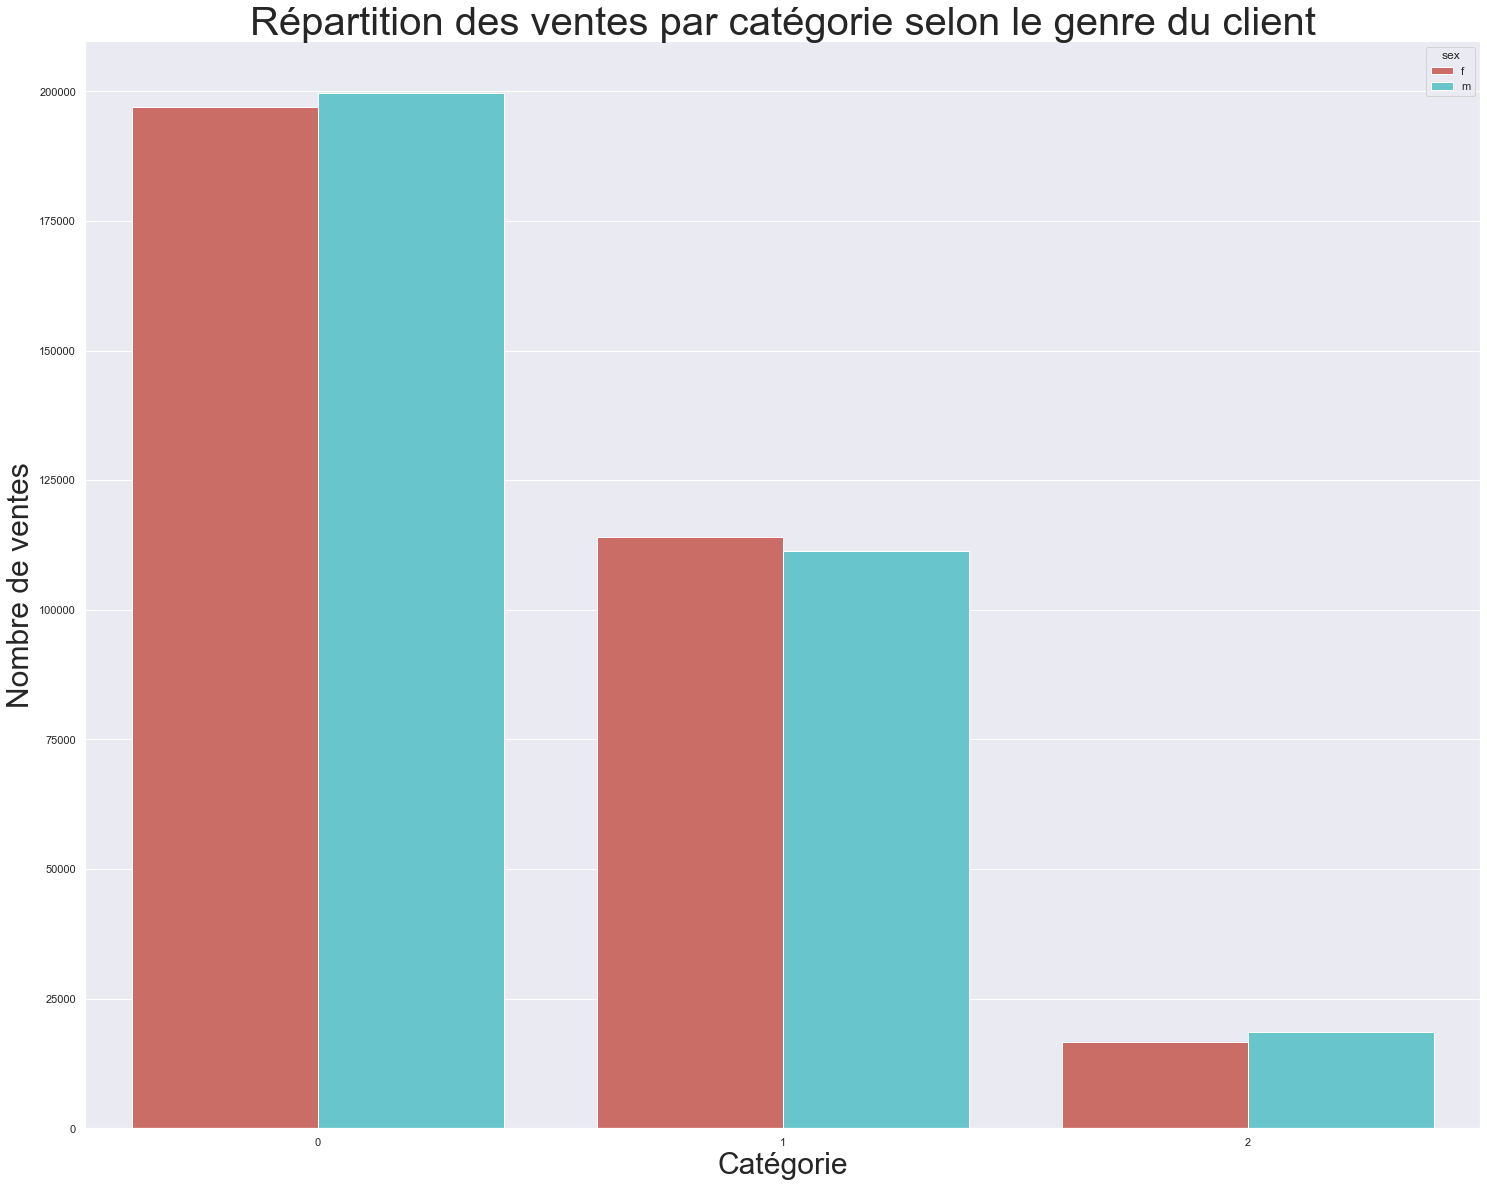

In [88]:
# nbre de ventes par categ par sex
ventes_categ_sexe=general2.groupby(['categ','sex'])['price'].count().reset_index()
ventes_categ_sexe.rename(columns={'price': 'nbre_de_ventes'}, inplace=True)

sns.set(rc = {'figure.figsize':(25,20)})
sns.barplot(x ="categ", y = 'nbre_de_ventes', data = ventes_categ_sexe, hue = "sex",palette="hls")
plt.title('Répartition des ventes par catégorie selon le genre du client',fontsize=40)
plt.xlabel('Catégorie',fontsize=30)
plt.ylabel('Nombre de ventes',fontsize=30)

In [89]:
### Nbre de vente par categ par sexe
sex_categ=general2[['sex','categ']].pivot_table(index='sex',columns='categ',aggfunc=len)
sex_categ

categ,0,1,2
sex,,,
f,196986,114087,16722
m,199711,111416,18590


In [90]:
chi2, p, dof, ex = st.chi2_contingency(sex_categ)
print("chi2", chi2)
print("p_value", p)
print("ddl", dof)
print("table theorique", ex)

chi2 143.5555396400573
p_value 6.719092869603587e-32
ddl 2
table theorique [[197768.69945339 112421.91151644  17604.38903016]
 [198928.30054661 113081.08848356  17707.61096984]]


In [91]:
table_theorique= [['f',197768, 112421 , 17604],['m',198928, 113081 , 17707]]
tabletheo = pd.DataFrame (table_theorique, columns = ['Genre','catégorie 0', 'catégorie 1','catégorie 2']
                         ).set_index(['Genre'])
tabletheo

,catégorie 0,catégorie 1,catégorie 2
Genre,,,
f,197768,112421,17604
m,198928,113081,17707


In [92]:
tabsexcateg, resultats =researchpy.crosstab(general2['sex'],general2['categ'],test="chi-square")
resultats

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,143.5555
1,p-value =,0.0000
2,Cramer's V =,0.0148


In [93]:
# ddl 
dfx = min(sex_categ.shape[0], sex_categ.shape[1]) - 1
dfx

1

In [94]:
#Test d'indépendance de cramer (V de cramer) : Gives the effect size
#correlation très faible qualifié de négligeable sur la table de Cramer
def cramers(sex_categ):
    chi2 = st.chi2_contingency(sex_categ)[0]
    n = sum(sex_categ.sum())
    return np.sqrt(chi2 / (n*(min(sex_categ.shape)-1)))
 
result = cramers(sex_categ)
print(result)

0.014776042662009693


In [95]:
#Chi-squared test statistic, sample size, and minimum of rows and columns
# le Cramer's V sur chaque catégorie nous montre que la relation est plus forte 
# sur la catégorie 2 mais reste qualifiée de négligeable (ce que l'on vérifie visuellement)
X2 = st.chi2_contingency(sex_categ, correction=False)[0]
n = np.sum(sex_categ)
minDim = min(sex_categ.shape)-1

#calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

#display Cramer's V
print(V)

categ
0    0.019023
1    0.025231
2    0.063760
dtype: float64


Text(0, 0.5, 'Prix des produits vendus')

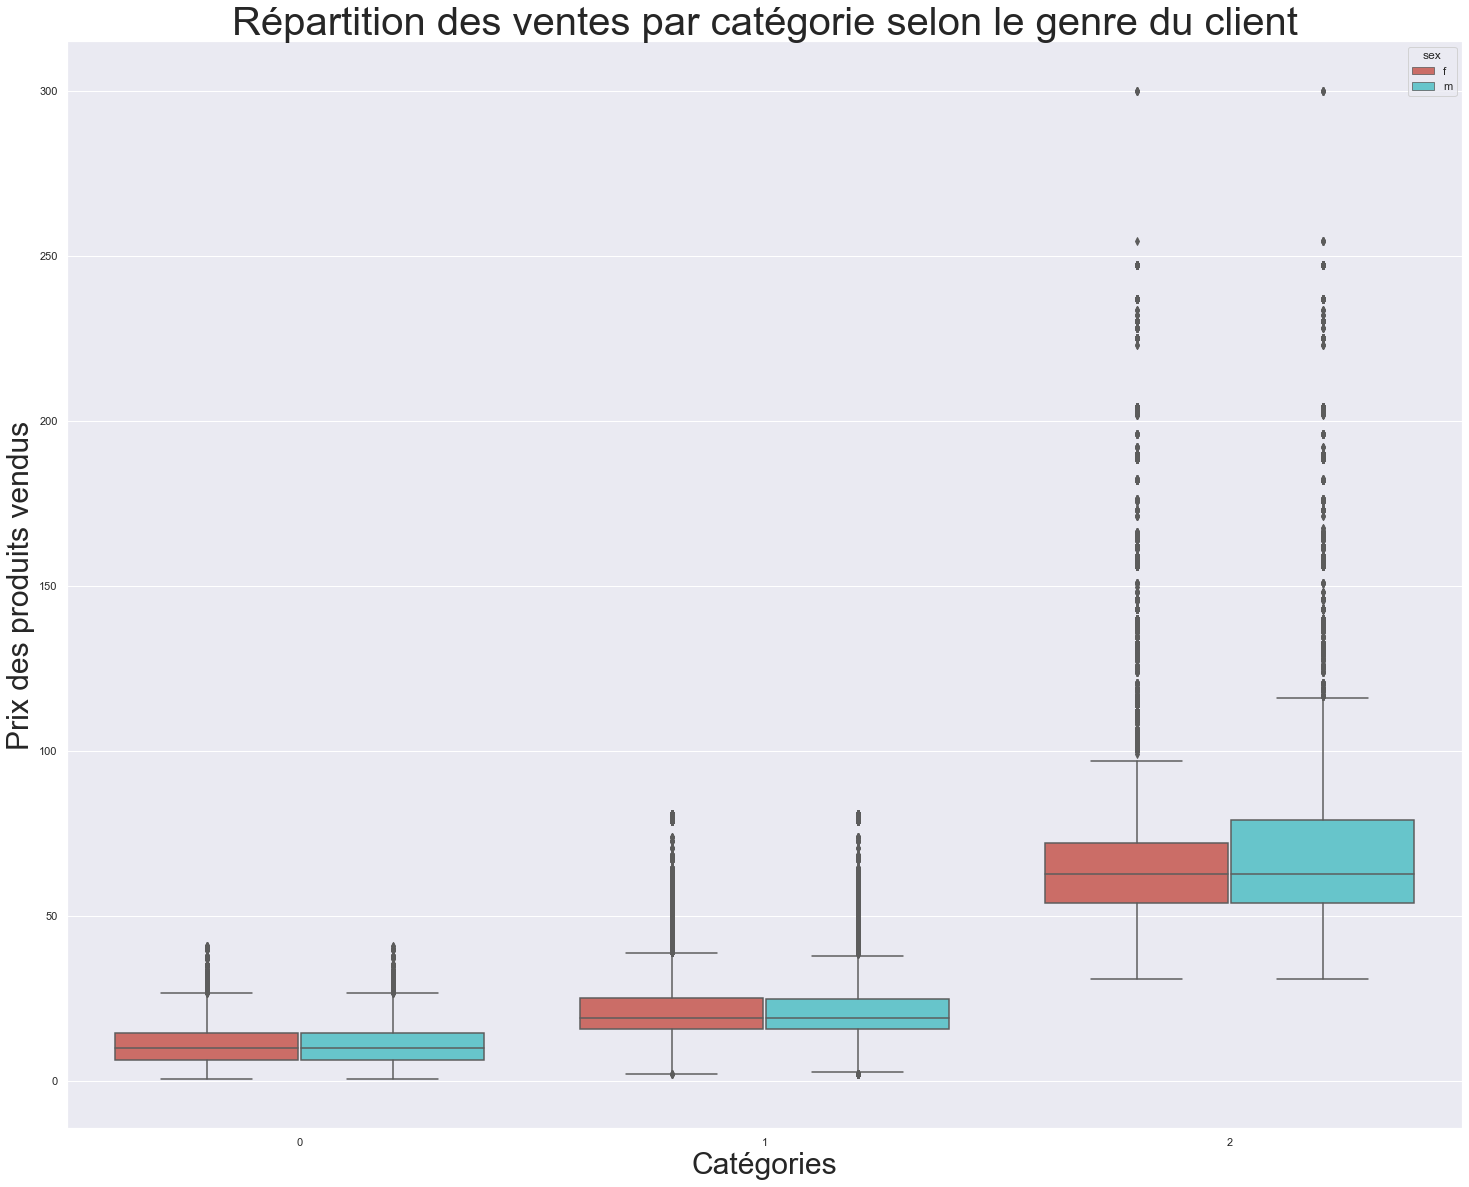

In [96]:
sns.boxplot(x='categ',y='price',data=general2,hue='sex',palette="hls")
plt.title('Répartition des ventes par catégorie selon le genre du client',fontsize=40)
plt.xlabel('Catégories',fontsize=30)
plt.ylabel('Prix des produits vendus',fontsize=30)

## B - Est-ce que le montant total des achats varie selon âge ?
### quanti et quanti : test PEARSON et SPEARMAN

In [97]:
CA_par_age

,age,CA
0,17,591414.23
1,18,172831.75
2,19,178767.19
3,20,174347.66
4,21,160555.21
...,...,...
71,88,5078.98
72,89,4803.64
73,90,2691.19
74,91,3959.24


In [98]:
## Pearson correlation coefficient and p-value for testing non-correlation. valeur -1 à 1 avec 0 no correlation
st.pearsonr(CA_par_age['age'], CA_par_age['CA'])

(-0.7790991635983091, 1.1570337913096282e-16)

In [99]:
st.spearmanr(CA_par_age['age'], CA_par_age['CA'])

SpearmanrResult(correlation=-0.857634996582365, pvalue=4.549641585441243e-23)

In [100]:
# Même test avec Pingouin pour plus de détails
pg.corr(CA_par_age['age'],CA_par_age['CA'])

,n,r,CI95%,p-val,BF10,power
pearson,76,-0.779099,"[-0.85, -0.67]",1.157034e-16,5.938e+13,1.0


In [101]:
pg.corr(CA_par_age['age'],CA_par_age['CA'],method='spearman')

,n,r,CI95%,p-val,power
spearman,76,-0.857635,"[-0.91, -0.78]",4.549642e-23,1.0


Text(0.5, 0, 'Age des clients')

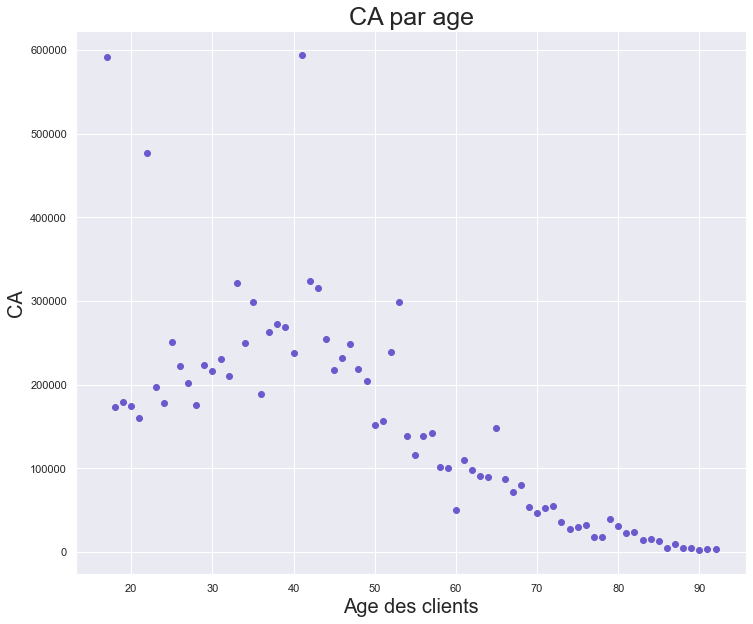

In [102]:
plt.figure(figsize=(12,10))
plt.scatter(CA_par_age['age'],CA_par_age['CA'],c='slateblue')
plt.title('CA par age',fontsize=25)
plt.ylabel('CA',fontsize=20)
plt.xlabel('Age des clients',size=20)

In [103]:
### CC = Comme vu sur la courbe de Lorenz sur l'age/CA en 1ere partie, 
# le CA n'est pas réparti équitablement par âge.
### Ici effectivement, le CA diminue avec l'âge du client.

## C - Age et fréquence d'achat 
QUANTI ET QUANTI

In [104]:
# Nombre de sessions par age
sessions_par_age=general2[['age','client_id','session_id']].groupby('age').nunique().reset_index()
sessions_par_age.rename(columns={'session_id': 'nombre_de_sessions'}, inplace=True)
sessions_par_age.rename(columns={'client_id': 'nombre_de_clients'}, inplace=True)
sessions_par_age

,age,nombre_de_clients,nombre_de_sessions
0,17,437,8341
1,18,145,2484
2,19,145,2527
3,20,125,2371
4,21,136,2358
...,...,...,...
71,88,8,223
72,89,6,196
73,90,4,91
74,91,4,143


In [105]:
# Creation d'une colonne fréquence mentuelle d'achat ( /23 mois car 24 mois moins Octobre 2021)
sessions_par_age['frequence_achat']=sessions_par_age['nombre_de_sessions']/sessions_par_age['nombre_de_clients']/23
sessions_par_age

,age,nombre_de_clients,nombre_de_sessions,frequence_achat
0,17,437,8341,0.829868
1,18,145,2484,0.744828
2,19,145,2527,0.757721
3,20,125,2371,0.824696
4,21,136,2358,0.753836
...,...,...,...,...
71,88,8,223,1.211957
72,89,6,196,1.420290
73,90,4,91,0.989130
74,91,4,143,1.554348


In [106]:
st.pearsonr(sessions_par_age['age'], sessions_par_age['frequence_achat'])

(0.062470183555997164, 0.5918889698637236)

In [107]:
st.spearmanr(sessions_par_age['age'], sessions_par_age['frequence_achat'])

SpearmanrResult(correlation=-0.05618707151703915, pvalue=0.6297415607052663)

In [108]:
# Mêmes tests avec Pingouin pour plus de détails
pg.corr(sessions_par_age['age'],sessions_par_age['frequence_achat'])

,n,r,CI95%,p-val,BF10,power
pearson,76,0.06247,"[-0.17, 0.28]",0.591889,0.165,0.083473


In [109]:
pg.corr(sessions_par_age['age'],sessions_par_age['frequence_achat'],method='spearman')

,n,r,CI95%,p-val,power
spearman,76,-0.056187,"[-0.28, 0.17]",0.629742,0.076938


In [110]:
pg.corr(sessions_par_age['age'],sessions_par_age['frequence_achat'],method='kendall')

,n,r,CI95%,p-val,power
kendall,76,-0.126031,"[-0.34, 0.1]",0.107373,0.192741


Text(0.5, 0, 'Age des clients')

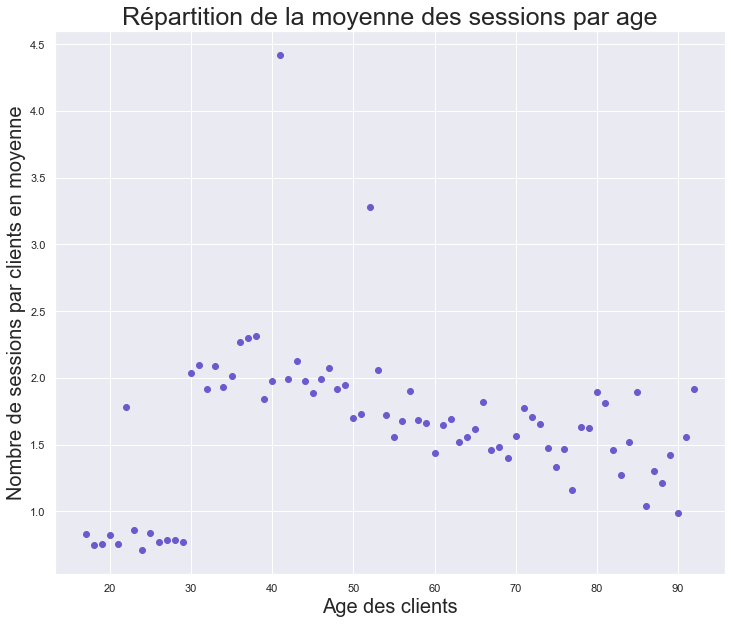

In [111]:
plt.figure(figsize=(12,10))
plt.scatter(sessions_par_age['age'],sessions_par_age['frequence_achat'],c='slateblue')
plt.title('Répartition de la moyenne des sessions par age',fontsize=25)
plt.ylabel('Nombre de sessions par clients en moyenne',fontsize=20)
plt.xlabel('Age des clients',size=20)

In [112]:
## La fréquence d'achat ne varie pas avec l'âge

## D - Correlation taille panier moyen en fonction de l'âge ?
taille du panier moyen = CA  / nbre de sessions pour chaque âge
QUANTI QUANTI

In [113]:
panier_par_age=general2[['age','price']].groupby('age').mean().reset_index()
panier_par_age.rename(columns={'price': 'panier_moyen'}, inplace=True)
panier_par_age

,age,panier_moyen
0,17,40.044298
1,18,40.781442
2,19,40.037445
3,20,41.900423
4,21,37.364489
...,...,...
71,88,16.175096
72,89,16.394676
73,90,16.409695
74,91,17.834414


In [114]:
st.pearsonr(panier_par_age['panier_moyen'],panier_par_age['age'])

(-0.5474124418534584, 3.1008776293407445e-07)

In [115]:
st.spearmanr(panier_par_age['panier_moyen'],panier_par_age['age'])

SpearmanrResult(correlation=-0.09006151742993848, pvalue=0.4391082212474995)

In [116]:
pg.corr(panier_par_age['age'],panier_par_age['panier_moyen'])

,n,r,CI95%,p-val,BF10,power
pearson,76,-0.547412,"[-0.69, -0.37]",3.100878e-07,5.404e+04,0.999552


In [117]:
pg.corr(panier_par_age['age'],panier_par_age['panier_moyen'],method='spearman')

,n,r,CI95%,p-val,power
spearman,76,-0.090062,"[-0.31, 0.14]",0.439108,0.121086


In [118]:
# pearson donne une correlation negative entre panier moyen et age. 
# spearman ne la detecte pas car la relation n'est pas linèaire : les variations se font pas gros paliers d'âge

Text(0.5, 0, 'Age des clients')

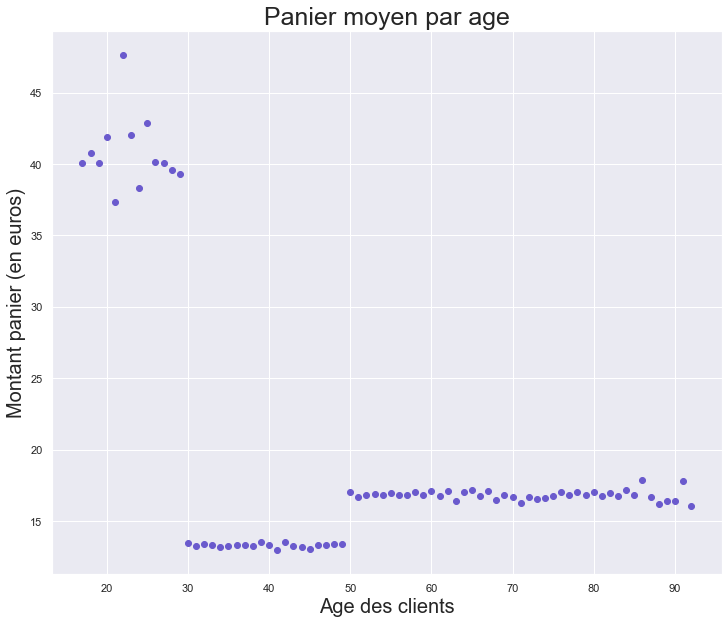

In [119]:
plt.figure(figsize=(12,10))
plt.scatter(panier_par_age['age'],panier_par_age['panier_moyen'],c='slateblue')
plt.title('Panier moyen par age',fontsize=25)
plt.ylabel('Montant panier (en euros)',fontsize=20)
plt.xlabel('Age des clients',size=20)

In [120]:
############## CC : Les jeunes ont un panier moyen plus élevé, les middle age achètent plus souvent #########
##### les plus de 60 ans ont un panier moyen faible et achètent moins souvent #####

## E - Catégorie de livres achetés en fonction de l'âge ?
La catégorie est-elle corrélée à l age ?

In [121]:
# catégorie : quali et age : quanti ------> ANOVA

In [122]:
categ_par_age=general.groupby(['age','categ'])['id_prod'].count().reset_index()
categ_par_age

,age,categ,id_prod
0,17,0,3418
1,17,1,5719
2,17,2,6012
3,18,0,909
4,18,1,1678
...,...,...,...
223,91,1,149
224,91,2,2
225,92,0,78
226,92,1,122


In [123]:
df_anovax=categ_par_age.pivot_table(columns='categ',index='age').reset_index()
df_anovax

age id_prod            
categ           0     1     2
0      17    3418  5719  6012
1      18     909  1678  1784
2      19    1016  1723  1845
3      20     974  1550  1728
4      21    1114  1628  1671
..     ..     ...   ...   ...
71     88     142   183     1
72     89     132   177     2
73     90      77    91     2
74     91      75   149     2
75     92      78   122     1

[76 rows x 4 columns]

In [124]:
aov=pg.anova(data=general2, dv='age', between='categ', detailed=True)

In [125]:
ptx = pg.pairwise_tukey(dv='age', between='categ', data=general2 ,effsize='eta-square')
ptx

,A,B,mean(A),mean(B),diff,se,T,p-tukey,eta-square
0,0,1,42.902760,46.650364,-3.747604,0.033706,-111.185034,0.001,0.021043
1,0,2,42.902760,24.941408,17.961352,0.070975,253.066826,0.001,0.330552
2,1,2,46.650364,24.941408,21.708956,0.073144,296.798677,0.001,0.419047


In [126]:
from pingouin import kruskal

In [127]:
### kruskall wallis avec pingouin pack
kruskal(data=general2, dv='age', between='categ')

,Source,ddof1,H,p-unc
Kruskal,categ,2,76842.823704,0.0


In [128]:
st.kruskal(general2['age'], general2['categ'])
x = general2[general2['categ']==0]
x1=x['age']
y = general2[general2['categ']==1]
y1=y['age']
z = general2[general2['categ']==2]
z1=z['age']
st.kruskal(x1, y1, z1)

KruskalResult(statistic=76842.8237038998, pvalue=0.0)

In [129]:
# Même ANOVA autre librairie
ANOVA2 = statsmodels.formula.api.ols('age ~ categ', data = general2).fit()

In [130]:
table2 = statsmodels.api.stats.anova_lm(ANOVA2)
table2

,df,sum_sq,mean_sq,F,PR(>F)
categ,2.0,1.449148e+07,7.245742e+06,44359.518228,0.0
Residual,657509.0,1.073984e+08,1.633413e+02,NaN,NaN


### La catégorie de livre acheté va dépendre de l'âge du client. Les catégories 0 et 1 sont achetés par les mêmes clients. Les plus jeunes vont acheter largement dans la catégorie 2 tandis que les clients d'âge moyen et plus agés dans les catégories 0 et 1 et très peu dans la 2.

In [131]:
######## tests normalité des distributions et égalité des variances #########
norm_cat0=general2[general2['categ']==0]
norm_cat1=general2[general2['categ']==1]
norm_cat2=general2[general2['categ']==2]

In [132]:
# test de normalité des variables : ici, les variables n'ont pas une distribution normale
# This function tests the null hypothesis that a sample comes from a normal distribution
st.normaltest(norm_cat0['age'])

NormaltestResult(statistic=63475.1138229918, pvalue=0.0)

In [133]:
st.normaltest(norm_cat1['age'])

NormaltestResult(statistic=3863.026761983456, pvalue=0.0)

In [134]:
st.normaltest(norm_cat2['age'])

NormaltestResult(statistic=21712.842321557786, pvalue=0.0)

In [135]:
# Les variances intra catégories :
from scipy.stats import variation
variation(norm_cat0['age'])

0.2613447949802016

In [136]:
variation(norm_cat1['age'])

0.33214696763952145

In [137]:
variation(norm_cat2['age'])

0.3925958358202901

In [138]:
## test homoscedasticity levene : les variances ne sont pas égales.
#The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
# rejet de H0 : les variances sont differentes.
from scipy.stats import levene
stat, p = levene(norm_cat0['age'], norm_cat1['age'], norm_cat2['age'])
p

0.0

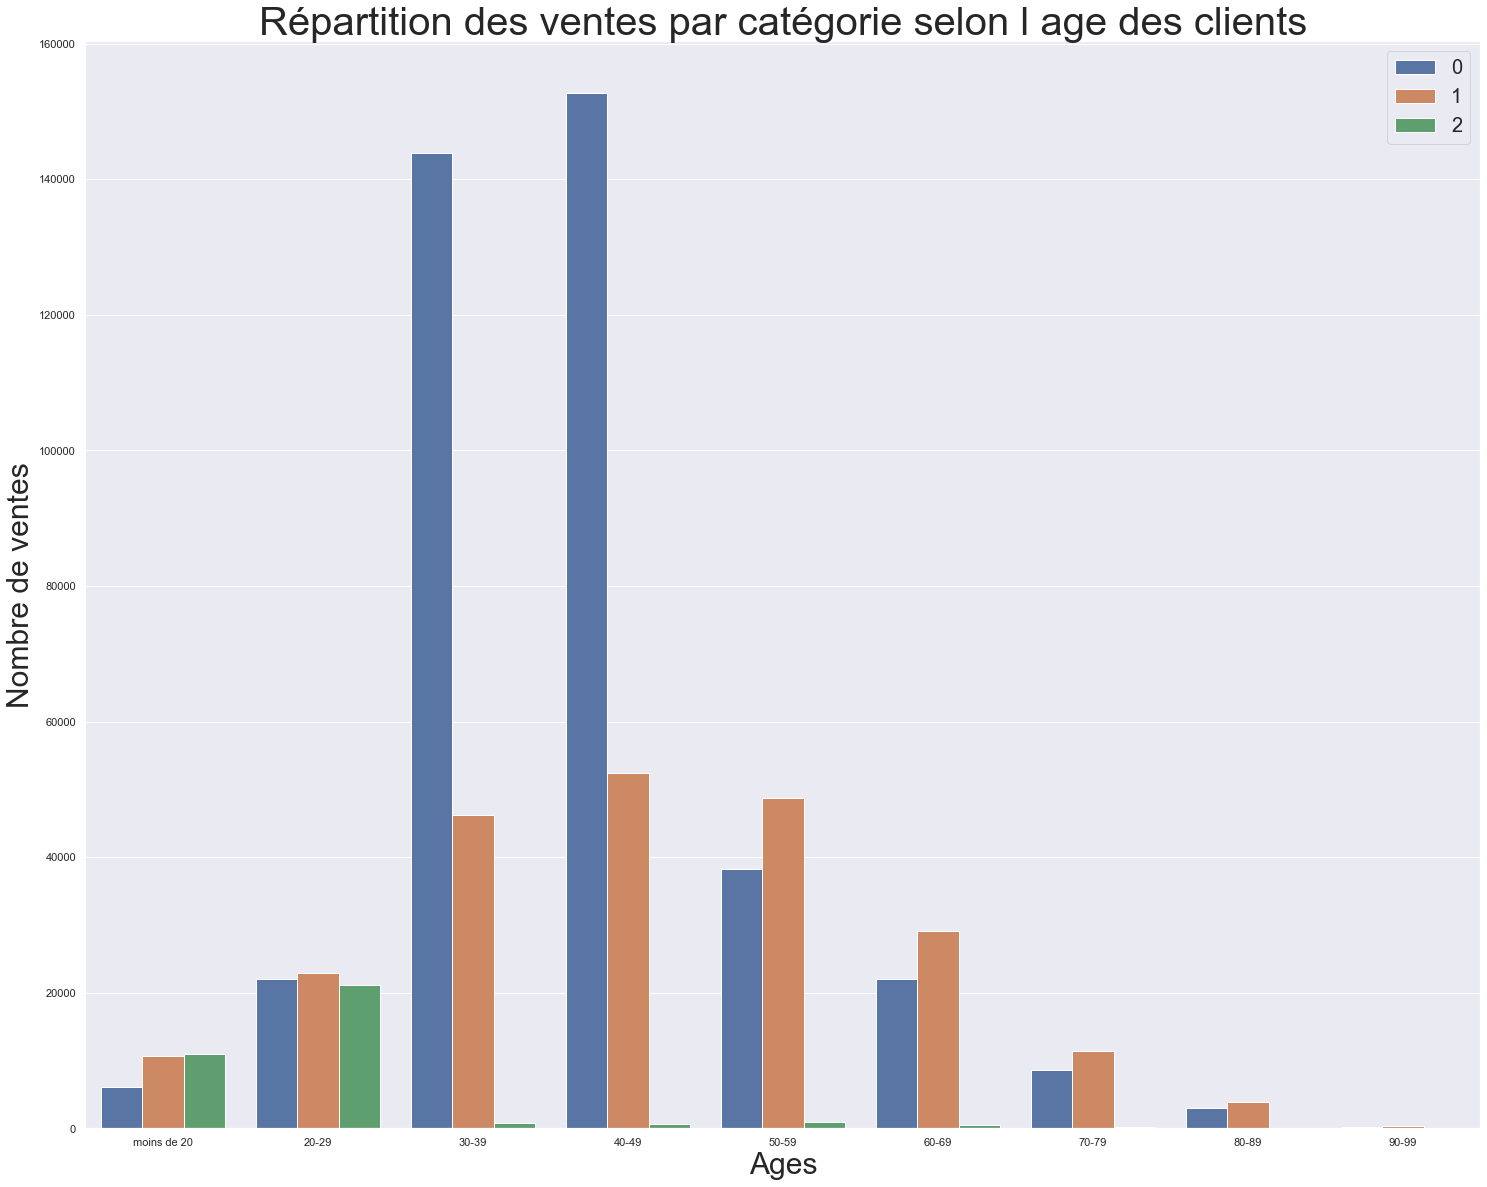

In [139]:
# Nbre de ventes par classe d'âge
sns.set(rc = {'figure.figsize':(25,20)})
sns.barplot(x ="classe_age", y = 'nbre_ventes', data = ventes_par_classe_age, hue = "categ")
plt.title('Répartition des ventes par catégorie selon l age des clients',fontsize=40)
plt.xlabel('Ages',fontsize=30)
plt.ylabel('Nombre de ventes',fontsize=30)
plt.legend(prop={'size': 20})

## F - Probabilité qu'un client achète la ref 0_525 sachant qu'il a acheté 2_159 ?
(sans notion d'ordre)

In [140]:
PA=general2[general2['id_prod']=='2_159']
PB=general2[general2['id_prod']=='0_525']

In [141]:
P_merge=PA.merge(PB,on='client_id',how="outer",indicator=True)
P_merge

,id_prod_x,date_x,session_id_x,client_id,Month_x,Day_x,price_x,categ_x,sex_x,birth_x,...,session_id_y,Month_y,Day_y,price_y,categ_y,sex_y,birth_y,age_y,classe_age_y,_merge
0,2_159,2021-09-07 10:47:29.767245,s_86295,c_1609,2021-09-01,2021-09-07,145.99,2,m,1980,...,s_155886,2022-01-01,2022-01-27,2.99,0,m,1980.0,41.0,40-49,both
1,2_159,2021-09-07 10:47:29.767245,s_86295,c_1609,2021-09-01,2021-09-07,145.99,2,m,1980,...,s_54595,2021-06-01,2021-06-27,2.99,0,m,1980.0,41.0,40-49,both
2,2_159,2021-09-07 10:47:29.767245,s_86295,c_1609,2021-09-01,2021-09-07,145.99,2,m,1980,...,s_86295,2021-09-01,2021-09-07,2.99,0,m,1980.0,41.0,40-49,both
3,2_159,2021-09-07 10:47:29.767245,s_86295,c_1609,2021-09-01,2021-09-07,145.99,2,m,1980,...,s_341805,2023-02-01,2023-02-15,2.99,0,m,1980.0,41.0,40-49,both
4,2_159,2021-09-07 10:47:29.767245,s_86295,c_1609,2021-09-01,2021-09-07,145.99,2,m,1980,...,s_272192,2022-09-01,2022-09-23,2.99,0,m,1980.0,41.0,40-49,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2_159,2021-08-15 22:38:26.452716,s_76246,c_7412,2021-08-01,2021-08-15,145.99,2,f,2001,...,s_76246,2021-08-01,2021-08-15,2.99,0,f,2001.0,20.0,moins de 20,both
832,2_159,2021-08-28 04:58:38.000115,s_81685,c_5710,2021-08-01,2021-08-28,145.99,2,f,2003,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
833,2_159,2022-09-28 04:58:38.000115,s_274635,c_5710,2022-09-01,2022-09-28,145.99,2,f,2003,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only
834,2_159,2023-01-28 04:58:38.000115,s_333485,c_5710,2023-01-01,2023-01-28,145.99,2,f,2003,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [142]:
P_merge['_merge'].unique()

['both', 'left_only']
Categories (2, object): ['both', 'left_only']

In [143]:
P_merge[P_merge['_merge']=='both'].count()

id_prod_x       703
date_x          703
session_id_x    703
client_id       703
Month_x         703
Day_x           703
price_x         703
categ_x         703
sex_x           703
birth_x         703
age_x           703
classe_age_x    703
id_prod_y       703
date_y          703
session_id_y    703
Month_y         703
Day_y           703
price_y         703
categ_y         703
sex_y           703
birth_y         703
age_y           703
classe_age_y    703
_merge          703
dtype: int64

In [144]:
P_merge[P_merge['_merge']=='left_only'].count()

id_prod_x       133
date_x          133
session_id_x    133
client_id       133
Month_x         133
Day_x           133
price_x         133
categ_x         133
sex_x           133
birth_x         133
age_x           133
classe_age_x    133
id_prod_y         0
date_y            0
session_id_y      0
Month_y           0
Day_y             0
price_y           0
categ_y           0
sex_y             0
birth_y           0
age_y             0
classe_age_y      0
_merge          133
dtype: int64

In [145]:
print("La probabilité qu'un client achète ces deux références est de :","{:.2f}".format(703/(133+703)*100),"%")

La probabilité qu'un client achète ces deux références est de : 84.09 %


In [146]:
# Avec notion d'ordre La categ 2 (verte) avant la bleue (0)
P_merge[P_merge['date_x']<P_merge['date_y']].count()

id_prod_x       601
date_x          601
session_id_x    601
client_id       601
Month_x         601
Day_x           601
price_x         601
categ_x         601
sex_x           601
birth_x         601
age_x           601
classe_age_x    601
id_prod_y       601
date_y          601
session_id_y    601
Month_y         601
Day_y           601
price_y         601
categ_y         601
sex_y           601
birth_y         601
age_y           601
classe_age_y    601
_merge          601
dtype: int64

In [147]:
# Nombre de clients qui achètent ces deux références (vérifier que ce ne soit pas le même client Business)
P_merge['client_id'].nunique()

514

In [148]:
print("La probabilité qu'un client achète d'abord 2_159 cat 2 avant réf 0_525 cat 0 bleue est de :"
      "{:.2f}".format(601/(133+601)*100)," %")

La probabilité qu'un client achète d'abord 2_159 cat 2 avant réf 0_525 cat 0 bleue est de :81.88  %
